In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
dataset = pd.read_csv('/content/cars_ds_final.csv', index_col = 0)

# Dataset Insight

In [ ]:
dataset.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Data columns (total 140 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Make                                       object 
 1    Model                                      object 
 2    Variant                                    object 
 3    Ex-Showroom_Price                          object 
 4    Displacement                               object 
 5    Cylinders                                  float64
 6    Valves_Per_Cylinder                        float64
 7    Drivetrain                                 object 
 8    Cylinder_Configuration                     object 
 9    Emission_Norm                              object 
 10   Engine_Location                            object 
 11   Fuel_System                                object 
 12   Fuel_Tank_Capacity                         object 
 13   Fuel_Type                           

In [ ]:
dataset.isna().sum().sum()

58433

In [ ]:
dataset.shape

(1276, 140)

In [ ]:
1276 * 140

178640

In [ ]:
dataset.shape[0]

1276

# Data Cleaning

In [ ]:
row_size = dataset.shape[0]

for i in dataset.columns:
  if dataset[i].isna().sum() > 0:
    print(i, "-------------> ", (dataset[i].isnull().sum()/row_size) * 100)

Make ------------->  5.877742946708464
Displacement ------------->  0.9404388714733543
Cylinders ------------->  5.172413793103448
Valves_Per_Cylinder ------------->  7.993730407523511
Drivetrain ------------->  0.54858934169279
Cylinder_Configuration ------------->  1.018808777429467
Emission_Norm ------------->  0.8620689655172413
Engine_Location ------------->  3.369905956112853
Fuel_System ------------->  0.6269592476489028
Fuel_Tank_Capacity ------------->  5.407523510971787
Height ------------->  0.07836990595611285
Width ------------->  0.9404388714733543
Body_Type ------------->  0.4702194357366771
Doors ------------->  0.3134796238244514
City_Mileage ------------->  43.495297805642636
Highway_Mileage ------------->  62.695924764890286
ARAI_Certified_Mileage ------------->  8.934169278996865
ARAI_Certified_Mileage_for_CNG ------------->  97.88401253918495
Kerb_Weight ------------->  28.605015673981192
Gears ------------->  8.22884012539185
Ground_Clearance ------------->  22.64

For **Make**

In [ ]:
missing_make = dataset[dataset['Make'].isna()]

In [ ]:
dataset['Make'].fillna(dataset['Model'], inplace = True)

In [ ]:
dataset['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz B-Class',
       'Mercedes-Benz Cla-Class', 'Dc', 'Mini', 'Volvo', 'Jaguar', 'Bmw',
       'Land Rover', 'Mercedes-Benz E-Class Cabriolet', 'Porsche',
       'Mercedes-Benz Gls', 'Lexus', 'Mercedes-Benz S-Class', 'Maserati',
       'Mercedes-Benz G-Class', 'Mercedes-Benz Maybach',
       'Mercedes-Benz S-Class Cabriolet', 'Lamborghini', 'Bentley',
       'Ferrari', 'Aston Martin', 'Rolls-Royce Ghost Series Ii',
       'Rolls-Royce Wraith', 'Rolls-Royce Cullinan',
       'Rolls-Royce Phantom Coupe', 'Bugatti', 'Bajaj', 'Icml', 'Force',
       'Mg', 'Kia', 'Land Rover Rover', 'Mercedes-Benz E-Class',
       'Mercedes-Benz C-Class Cabriolet', 'Mercedes-Benz V-Class',
       'Mercedes-Benz E-Class All Terrain', 'Mercedes-Benz Amg-Gt',
       'Mercedes-Benz Amg Gt 4-Door Coupe', 'Rolls

In [ ]:
dataset.loc[dataset['Make'].str.contains('Mercedes-Benz', na=False), 'Make'] = 'Mercedes-Benz'
dataset.loc[dataset['Make'].str.contains('Rolls-Royce', na=False), 'Make'] = 'Rolls-Royce'
dataset.loc[dataset['Make'].str.contains('Go+', na=False), 'Make'] = 'Datsun'
dataset.loc[dataset['Make'].str.contains('Maruti Suzuki R', na=False), 'Make'] = 'Maruti Suzuki'
dataset['Make'] = dataset['Make'].str.replace('Land Rover Rover', 'Land Rover')

In [ ]:
dataset['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz', 'Dc',
       'Mini', 'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Rolls-Royce', 'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Mitsubishi'], dtype=object)

In [ ]:
dataset.loc[dataset['Make'].str.contains('Wagon', na=False), 'Make'] = 'Wagon R'
dataset['Model'] = dataset['Model'].str.replace('Wagon', 'Wagon R')
dataset['Model'] = dataset['Model'].str.replace('Mercedes-Benz ', '')
dataset['Model'] = dataset['Model'].str.replace('Rolls-Royce ', '')
dataset['Variant'] = dataset['Variant'].str.replace('Datsun ', '')

In [ ]:
dataset.sample(10)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
188,Ford,Aspire,1.5 Tdci Trend Plus,"Rs. 7,77,400",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Hyundai,Santro,Sportz Amt,"Rs. 5,70,990",1086 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,Hyundai,Aura,Sx (O) 1.2 Petrol,"Rs. 7,85,900",1197 cc,NaN,NaN,FWD (Front Wheel Drive),In-line,BS 6,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
703,Toyota,Innova Crysta,2.7 Gx At 7 Str,"Rs. 16,15,000",2694 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS VI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1116,Skoda,Rapid,Onyx At Diesel,"Rs. 12,73,599",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
234,Honda,Jazz,Exclusive Edition Cvt,"Rs. 9,28,000",1199 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
857,Land Rover,Range,3.0L V6 Vogue Se Lwb Petrol,"Rs. 2,13,98,758",2995 cc,6.0,4.0,4WD,V,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1113,Skoda,Rapid,Onyx Mt Petrol,"Rs. 9,75,599",1598 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
363,Maruti Suzuki,Alto,Vxi,"Rs. 3,76,100",796 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,Volkswagen,Ameo,Gt Line Tdi Dsg,"Rs. 9,99,900",1498 cc,NaN,NaN,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [ ]:
spec_column_1 = ['Ex-Showroom_Price','Displacement']
print(dataset[spec_column_1].head())

  Ex-Showroom_Price Displacement
0      Rs. 2,92,667       624 cc
1      Rs. 2,36,447       624 cc
2      Rs. 2,96,661       624 cc
3      Rs. 3,34,768       624 cc
4      Rs. 2,72,223       624 cc


Ex-Showroom cleaning


In [ ]:
dataset['Ex-Showroom_Price'] = dataset['Ex-Showroom_Price'].replace(r'\D', '', regex=True)
dataset.rename(columns={'Ex-Showroom_Price': 'Ex-Showroom_Price_INR'}, inplace=True)
dataset['Ex-Showroom_Price_INR'] = dataset['Ex-Showroom_Price_INR'].astype(int)

Displacement cleaning

In [ ]:
dataset['Displacement'] = dataset['Displacement'].replace(r'\D', '', regex=True)
dataset.rename(columns={'Displacement': 'Displacement_cc'}, inplace=True)
dataset['Displacement_cc'] = dataset['Displacement_cc'].astype(float)

In [ ]:
spec_colmn_1 = ['Ex-Showroom_Price_INR', 'Displacement_cc']
print(dataset[spec_colmn_1].head())

   Ex-Showroom_Price_INR  Displacement_cc
0                 292667            624.0
1                 236447            624.0
2                 296661            624.0
3                 334768            624.0
4                 272223            624.0


Converting "Cylinders" & "Valves_per_cylinder" to float.

In [ ]:
dataset['Cylinders'] = dataset['Cylinders'].astype(float)
dataset['Valves_Per_Cylinder'] = dataset['Valves_Per_Cylinder'].astype(float)

cleaning Drivetrain

In [ ]:
dataset['Drivetrain'].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD', nan], dtype=object)

In [ ]:
dataset['Drivetrain'] = dataset['Drivetrain'].str.replace(r'\(Rear Wheel Drive\)', '', regex=True)
dataset['Drivetrain'] = dataset['Drivetrain'].str.replace(r'\(Front Wheel Drive\)', '', regex=True)
dataset['Drivetrain'] = dataset['Drivetrain'].str.replace(r'\(All Wheel Drive\)', '', regex=True)

cleaning emission_norm and engine_location

In [ ]:
dataset['Emission_Norm'].unique()

array(['BS IV', 'BS 6', nan, 'BS III', 'BS VI'], dtype=object)

In [ ]:
dataset['Emission_Norm'] = dataset['Emission_Norm'].str.replace('BS 6', 'BS VI')

In [ ]:
dataset['Emission_Norm'].unique()

array(['BS IV', 'BS VI', nan, 'BS III'], dtype=object)

In [ ]:
dataset['Engine_Location'].unique()

array(['Rear, Transverse', 'Front, Transverse', 'Front, Longitudinal',
       nan, 'Rear Mid, Transverse', 'Mid, Longitudinal',
       'Mid, Transverse', 'Rear, Longitudinal'], dtype=object)

In [ ]:
dataset['Engine_Location'] = dataset['Engine_Location'].str.replace(', ', ' - ')

In [ ]:
dataset['Engine_Location'].unique()

array(['Rear - Transverse', 'Front - Transverse', 'Front - Longitudinal',
       nan, 'Rear Mid - Transverse', 'Mid - Longitudinal',
       'Mid - Transverse', 'Rear - Longitudinal'], dtype=object)

Cleaning Flue_tank_capacity, height, length, width, ground_clearance, Kerb_weight

In [ ]:
fuel = ['Fuel_Tank_Capacity']
print(dataset[fuel].head())

  Fuel_Tank_Capacity
0          24 litres
1          24 litres
2          15 litres
3          24 litres
4          24 litres


In [ ]:
dataset['Fuel_Tank_Capacity'] = dataset['Fuel_Tank_Capacity'].replace(r'\D', '', regex=True)
dataset.rename(columns={'Fuel_Tank_Capacity': 'Fuel_Tank_Capacity_litres'}, inplace=True)
dataset['Fuel_Tank_Capacity_litres'] = dataset['Fuel_Tank_Capacity_litres'].astype(float)

In [ ]:
fuel = ['Fuel_Tank_Capacity_litres']
print(dataset[fuel].head())

   Fuel_Tank_Capacity_litres
0                       24.0
1                       24.0
2                       15.0
3                       24.0
4                       24.0


In [ ]:
dimension = ['Height', 'Length', 'Width', 'Kerb_Weight', 'Ground_Clearance']
print(dataset[dimension].head())

    Height   Length    Width Kerb_Weight Ground_Clearance
0  1652 mm  3164 mm  1750 mm      660 kg           180 mm
1  1652 mm  3164 mm  1750 mm      725 kg           180 mm
2  1652 mm  3164 mm  1750 mm      710 kg           180 mm
3  1652 mm  3164 mm  1750 mm      725 kg           180 mm
4  1652 mm  3164 mm  1750 mm      725 kg           180 mm


In [ ]:
dataset['Height'] = dataset['Height'].replace(r'\D', '', regex=True)
dataset['Length'] = dataset['Length'].replace(r'\D', '', regex=True)
dataset['Width'] = dataset['Width'].replace(r'\D', '', regex=True)
dataset['Kerb_Weight'] = dataset['Kerb_Weight'].replace(r'\D', '', regex=True)
dataset['Ground_Clearance'] = dataset['Ground_Clearance'].replace(r'\D', '', regex=True)

dataset.rename(columns={'Height': 'Height_mm','Length': 'Length_mm','Width': 'Width_mm'}, inplace=True)
dataset.rename(columns={'Kerb_Weight': 'Kerb_Weight_kg','Ground_Clearance':'Ground_Clearance_mm'}, inplace=True)

dataset['Height_mm'] = dataset['Height_mm'].astype(float)
dataset['Length_mm'] = dataset['Length_mm'].astype(float)
dataset['Width_mm'] = dataset['Width_mm'].astype(float)
dataset['Kerb_Weight_kg'] = dataset['Kerb_Weight_kg'].astype(float)
dataset['Ground_Clearance_mm'] = dataset['Ground_Clearance_mm'].astype(float)


In [ ]:
dimension = ['Height_mm', 'Length_mm', 'Width_mm', 'Kerb_Weight_kg', 'Ground_Clearance_mm']
dataset[dimension].head()

,Height_mm,Length_mm,Width_mm,Kerb_Weight_kg,Ground_Clearance_mm
0,1652.0,3164.0,1750.0,660.0,180.0
1,1652.0,3164.0,1750.0,725.0,180.0
2,1652.0,3164.0,1750.0,710.0,180.0
3,1652.0,3164.0,1750.0,725.0,180.0
4,1652.0,3164.0,1750.0,725.0,180.0


Cleaning Body_Type, Gears and Body_type

In [ ]:
dataset['Body_Type'].unique()

array(['Hatchback', 'MPV', 'MUV', 'SUV', 'Sedan', 'Crossover', nan,
       'Coupe', 'Convertible', 'Sports, Hatchback', 'Sedan, Coupe',
       'Sports', 'Crossover, SUV', 'SUV, Crossover', 'Sedan, Crossover',
       'Sports, Convertible', 'Pick-up', 'Coupe, Convertible'],
      dtype=object)

In [ ]:
dataset['Gears'].value_counts()

,count
Gears,
5,614
6,233
8,139
7,137
9,30
4,16
7 Dual Clutch,1
Single Speed Reduction Gear,1


In [ ]:
dataset['Gears'] = dataset['Gears'].replace({'Single Speed Reduction Gear': '1', '7 Dual Clutch': '7'})
dataset['Gears'] = dataset['Gears'].astype(float)
dataset['Gears'].value_counts()


,count
Gears,
5.0,614
6.0,233
8.0,139
7.0,138
9.0,30
4.0,16
1.0,1


In [ ]:
dataset['Body_Type'] = dataset['Body_Type'].str.replace(', ', '-')

In [ ]:
dataset['Body_Type'].unique()

array(['Hatchback', 'MPV', 'MUV', 'SUV', 'Sedan', 'Crossover', nan,
       'Coupe', 'Convertible', 'Sports-Hatchback', 'Sedan-Coupe',
       'Sports', 'Crossover-SUV', 'SUV-Crossover', 'Sedan-Crossover',
       'Sports-Convertible', 'Pick-up', 'Coupe-Convertible'], dtype=object)

Cleaning Mileage

In [ ]:
dataset['ARAI_Certified_Mileage'].isnull().sum()

114

In [ ]:
dataset.loc[dataset['Fuel_Type'] != 'CNG', 'ARAI_Certified_Mileage'] = dataset['ARAI_Certified_Mileage'].fillna(dataset['Highway_Mileage'])

In [ ]:
dataset['ARAI_Certified_Mileage'].isnull().sum()

101

In [ ]:
dataset['ARAI_Certified_Mileage'].unique()

array(['23.6 km/litre', nan, '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23 km/litre', '23.01 km/litre', '24.04 km/litre',
       '15 km/litre', '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27.3 km/li

In [ ]:
dataset['ARAI_Certified_Mileage'] = dataset['ARAI_Certified_Mileage'].str.replace(r'\s*km/litre', '', regex=True)
dataset['ARAI_Certified_Mileage'] = dataset['ARAI_Certified_Mileage'].str.replace('9.8-10.0', '10.0')
dataset['ARAI_Certified_Mileage'] = dataset['ARAI_Certified_Mileage'].str.replace('22.4-21.9', '22.4')
dataset['ARAI_Certified_Mileage'] = dataset['ARAI_Certified_Mileage'].str.replace(r'\s*kmpl', '', regex=True)

dataset['ARAI_Certified_Mileage'] = dataset['ARAI_Certified_Mileage'].astype(float)

dataset['ARAI_Certified_Mileage'] = dataset['ARAI_Certified_Mileage'].replace(142.0, 14.2)
dataset['ARAI_Certified_Mileage'] = dataset['ARAI_Certified_Mileage'].replace(1449.0, 14.49)

dataset.rename(columns={'ARAI_Certified_Mileage': 'ARAI_Certified_Mileage_kmpl'}, inplace=True)


In [ ]:
dataset['ARAI_Certified_Mileage_kmpl'].unique()

array([23.6 ,   nan, 21.9 , 25.17, 22.5 , 23.  , 23.01, 24.04, 15.  ,
       24.07, 20.1 , 23.1 , 20.3 , 24.  , 20.89, 20.5 , 16.  , 23.7 ,
       18.16, 23.59, 18.97, 19.49, 22.95, 17.57, 15.7 , 20.14, 20.  ,
       28.4 , 22.  , 18.6 , 22.54, 18.15, 25.35, 20.4 , 25.4 , 18.78,
       17.21, 19.91, 24.4 , 19.  , 21.66, 21.73, 26.1 , 19.4 , 16.78,
       17.71, 20.08, 17.1 , 23.87, 21.01, 19.56, 18.2 , 27.3 , 16.3 ,
       13.8 , 12.35, 12.05, 17.06, 14.4 , 19.5 , 18.3 , 13.7 , 18.19,
       20.38, 19.2 , 14.81, 15.04, 17.9 , 10.  , 15.73, 16.9 , 21.15,
       14.59, 16.47, 11.  , 13.12, 19.33, 14.11, 18.56, 13.57, 13.38,
       11.24, 13.  , 12.8 ,  8.61,  7.4 , 11.6 , 12.  , 11.13, 18.  ,
       10.8 , 17.66, 11.86,  7.96, 13.5 ,  7.8 , 14.  ,  7.9 , 10.63,
        6.71,  8.6 ,  9.  ,  8.77, 17.3 ,  7.29, 10.2 ,  9.5 , 22.4 ,
       22.8 ,  5.95, 35.  , 22.05, 21.4 , 21.7 , 19.77, 25.32, 25.2 ,
       25.  , 11.12, 17.6 , 20.65, 27.4 , 23.8 , 11.9 , 17.52, 18.27,
       23.97, 16.5 ,

In [ ]:
dataset['ARAI_Certified_Mileage_for_CNG'].unique()

array([nan, '36 km/kg', '20 km/kg', '32.26 km/kg', '31.76 km/kg',
       '30.48 km/kg', '25 km/kg', '26.6 km/kg', '20.5 km/kg',
       '20.4 km/kg', '43 km/kg', '31.79 km/kg', '18.9 km/kg',
       '14.16 km/kg', '13.96 km/kg', '10.8 km/kg', '33.54 km/kg'],
      dtype=object)

In [ ]:
dataset['ARAI_Certified_Mileage_for_CNG'] = dataset['ARAI_Certified_Mileage_for_CNG'].str.replace(r'\s*km/kg', '', regex=True)
dataset['ARAI_Certified_Mileage_for_CNG'] = dataset['ARAI_Certified_Mileage_for_CNG'].astype(float)


dataset.rename(columns={'ARAI_Certified_Mileage_for_CNG': 'ARAI_Certified_Mileage_for_CNG_kmpkg'}, inplace=True)


In [ ]:
dataset['ARAI_Certified_Mileage_for_CNG_kmpkg'].unique()

array([  nan, 36.  , 20.  , 32.26, 31.76, 30.48, 25.  , 26.6 , 20.5 ,
       20.4 , 43.  , 31.79, 18.9 , 14.16, 13.96, 10.8 , 33.54])

In [ ]:
dataset['ARAI_Certified_Mileage_kmpl'].fillna(dataset['ARAI_Certified_Mileage_for_CNG_kmpkg'], inplace=True)

In [ ]:
mileage_drop = ['City_Mileage', 'Highway_Mileage','ARAI_Certified_Mileage_for_CNG_kmpkg']
dataset.drop(columns=mileage_drop, inplace=True)

Cleaning Suspension

In [ ]:
dataset['Front_Suspension'].unique()

array(['Independent, Lower Wishbone, McPherson Strut with gas filled dampers and anti-roll bar',
       'Double Pivot Arm',
       'Mac Pherson strut with Lower Transverse link, coil spring',
       'MacPherson Struts With Lower Transverse Links',
       'McPherson struts', 'McPherson Strut',
       'Gas Filled Mc Pherson Strut',
       'MacPherson Strut with anti-roll bar',
       'Macpherson strut with Coil Spring', nan, 'Mc Pherson Strut',
       'MacPherson Strut', 'Mc Pherson Struct',
       'Independent, Lower Wishbone, Mcpherson Strut with coil spring',
       'Independent Lower Wishbone, McPherson Strut with coil Spring',
       'McPherson strut & coil spring', 'Mc Pherson-strut',
       'Dual-path McPherson strut with coil spring and anti-roll bar',
       'McPherson strut with coil spring',
       'McPherson strut with stabiliser bar',
       'MacPherson Strut with Staboilizer Bar', 'Independent McPherson',
       'Independent McPherson strut with Coil spring & Anti-roll bar'

In [ ]:
dataset.loc[dataset['Front_Suspension'].str.contains('MacPherson|Mac Pherson|Mc Pherson|McPherson|Macpherson|Mcpherson', na=False), 'Front_Suspension'] = 'MacPherson Suspension'
dataset.loc[dataset['Front_Suspension'].str.contains('Double Wishbone|Double wishbone|double-wishbone|double wishbone|Double wish-bone', na=False), 'Front_Suspension'] = 'Double Wishbone Suspension'
dataset.loc[dataset['Front_Suspension'].str.contains('link|Link', na=False), 'Front_Suspension'] = 'Multi Link Suspension'
dataset.loc[dataset['Front_Suspension'].str.contains('Adaptive|adaptive', na=False), 'Front_Suspension'] = 'Adaptive Suspension'
dataset.loc[dataset['Front_Suspension'].str.contains('Leaf spring|leaf spring|Leaf Spring', na=False), 'Front_Suspension'] = 'Leaf Spring Suspension'
dataset.loc[dataset['Front_Suspension'].str.contains('Air|air|AIRMATIC', na=False), 'Front_Suspension'] = 'Air Suspension'
dataset.loc[dataset['Front_Suspension'].str.contains('Damper|damper|damping|CONTROL', na=False), 'Front_Suspension'] = 'Damper Suspension'
dataset.loc[dataset['Front_Suspension'].str.contains('Independent|independent', na=False), 'Front_Suspension'] = 'Independent Suspension'
dataset.loc[dataset['Front_Suspension'].str.contains('Double joint|Double-Joint', na=False), 'Front_Suspension'] = 'Double Joint Suspension'
dataset.loc[dataset['Front_Suspension'].str.contains('single joint', na=False), 'Front_Suspension'] = 'Single Joint Suspension'
dataset.loc[~dataset['Front_Suspension'].str.contains('MacPherson|Double Wishbone|Multi Link|Adaptive|Leaf Spring|Air|Damper|Independent|Double', na=False), 'Front_Suspension'] = 'Aluminium Suspension'


In [ ]:
dataset['Front_Suspension'].unique()

array(['MacPherson Suspension', 'Double Pivot Arm',
       'Aluminium Suspension', 'Independent Suspension',
       'Double Wishbone Suspension', 'Multi Link Suspension',
       'Adaptive Suspension', 'Damper Suspension', 'Air Suspension',
       'Leaf Spring Suspension',
       'Hydraulic Double Acting, Telescopic Shock Absorber',
       'Double Joint Suspension'], dtype=object)

Rear suspension

In [ ]:
dataset['Rear_Suspension'].unique()

array(['Independent, Semi Trailing arm with coil spring & gas filled shock absorbers',
       'H-type Torsion Beam', 'Twist beam suspension with coil spring',
       '3 Link Rigid', '3-link rigid axle Suspension',
       'Coupled Torsion Beam Axle with coil spring', nan,
       'Coupled Torsion Beam Axle',
       'Semi-Independent; Twist beam with dual path strut',
       'Rear Twist beam with coil spring mounted on hydraulic shock absorbers',
       'Torsion Beam', 'Torison Beam', '5 rods system',
       'Twist Beam with Coil spring and Shock Absorber',
       'Semi-independent trailing arm',
       'Semi-independent twist beam with twin gas and oil filled shock absorbers',
       'Semi Independent, Twist Beam with coil Spring and Shock Absorber',
       'Semi Independent Trailing Arm',
       'H-Section torsion beam with programmed deflection-coil spring - See more at: http://mahindraverito.com/verito-specs.aspx#sthash.hu39n454.dpuf',
       'H-Section torsion beam with programmed de

In [ ]:
dataset.loc[dataset['Rear_Suspension'].str.contains('multi-link|multilink', case=False, na=False), 'Rear_Suspension'] = 'Multi-link Suspension'
dataset.loc[dataset['Rear_Suspension'].str.contains('torsion beam|torsion bar', case=False, na=False), 'Rear_Suspension'] = 'Torsion Beam Suspension'
dataset.loc[dataset['Rear_Suspension'].str.contains('double wishbone|wishbone', case=False, na=False), 'Rear_Suspension'] = 'Double Wishbone Suspension'
dataset.loc[dataset['Rear_Suspension'].str.contains('coil spring|coil-over|coilover', case=False, na=False), 'Rear_Suspension'] = 'Coil Spring Suspension'
dataset.loc[dataset['Rear_Suspension'].str.contains('independent|macpherson|mcpherson', case=False, na=False), 'Rear_Suspension'] = 'Independent Suspension'
dataset.loc[dataset['Rear_Suspension'].str.contains('leaf spring|leaf-sprung|leafsprung', case=False, na=False), 'Rear_Suspension'] = 'Leaf Spring Suspension'
dataset.loc[~dataset['Rear_Suspension'].str.contains('Multi-link|Torsion Beam|Double Wishbone|Coil Spring|Independent|Leaf Spring', case=False, na=False), 'Rear_Suspension'] = 'Other Suspension'


In [ ]:
dataset['Rear_Suspension'].unique()

array(['Coil Spring Suspension', 'Torsion Beam Suspension',
       'Other Suspension', 'Independent Suspension',
       'Multi-link Suspension', 'Double Wishbone Suspension',
       'Leaf Spring Suspension'], dtype=object)

Cleaning Track

In [ ]:
dataset[['Front_Track', 'Rear_Track']].head()

,Front_Track,Rear_Track
0,1325 mm,1315 mm
1,1325 mm,1315 mm
2,1325 mm,1315 mm
3,1325 mm,1315 mm
4,1325 mm,1315 mm


In [ ]:
dataset['Front_Track'] = dataset['Front_Track'].replace(r'\D', '', regex=True)
dataset['Rear_Track'] = dataset['Rear_Track'].replace(r'\D', '', regex=True)

In [ ]:
dataset.rename(columns={'Front_Track': 'Front_Track_mm','Rear_Track': 'Rear_Track_mm'}, inplace=True)

In [ ]:
dataset[['Front_Track_mm', 'Rear_Track_mm']].head()

,Front_Track_mm,Rear_Track_mm
0,1325,1315
1,1325,1315
2,1325,1315
3,1325,1315
4,1325,1315


Cleaning Tire

In [ ]:
dataset['Front_Tyre_&_Rim'] = dataset['Front_Tyre_&_Rim'].str.replace(' ','',regex=False)
dataset['Front_Tyre_&_Rim'].unique()

array(['135/70R12', '80/155R13', '155/80R13', '165/70R14', '155R13LT',
       '155/65R13', '155/70R13', nan, '175/65R14', '175/60R15',
       '175/65R15', '185/65R14', '185/65R15', '205/70R15', '205/70',
       '185/60R15', '165/65R14', '165/80R14', '185/70R14', '195/55R16',
       '175/70R14', '185/60R16', '195/55R15', '175/70R15', '205/55R16',
       '175/65', '225/60R17', '265/60R17', '245/70R17', '255/60R18',
       '215/65R17', '235/55R18', '235/65R18', '215/55R17', '205/55R17',
       '225/45R17', '255/35R20', '215/65R16', '235/55R17', '235/55R19',
       '225/50R1794Y', '43.66cm/17"LightAlloyWheelsJCWTrackSpoke,Black',
       '225/55R18', '225/60R19', '245/50R19', '235/60R18', '245/45R18',
       '245/40R18', '255/50R19', '255/40R19', '265/60R18', '265/50R20',
       '295/45R20', '255/40R18', '245/35ZR19', '235/40R18', '275/55R19',
       '295/40R21', '235/60VR18', '265/35R19', '(245/50R18', '245/45R19',
       '245/40R20', '275/50R20', '255/45ZR19', '255/60ZR18', '285/45R21',
 

In [ ]:
dataset[['F_Tire_Width', 'F_Tire']] = dataset['Front_Tyre_&_Rim'].str.split('/', n=1, expand=True)
dataset[['F_Tire_Aspect_Ratio', 'F_Tire_Diameter']] = dataset['F_Tire'].str.split('R', n=1, expand=True)

f_drop = ['F_Tire']
dataset.drop(columns=f_drop, inplace=True)

dataset['F_Tire_Width'] = dataset['F_Tire_Width'].replace({'155R13LT':'155','(245':'245','R12':np.nan,'R16':np.nan,'43.66cm':np.nan,'P215':'215','P235':'235','145R12LT6PR':'145' , '195R15LT,8PRRadial':'195','21565R16':'215'})
dataset['F_Tire_Aspect_Ratio'] = dataset['F_Tire_Aspect_Ratio'].replace({'17"LightAlloyWheelsJCWTrackSpoke,Black':'43','35Z':'35','Z':'','40/20':'40','30Z':'30','40Z':'40','60/':'60','45Z':'45','60Z':'60','60V':'60','55Z':'55','155':np.nan,None:np.nan})
dataset['F_Tire_Diameter'] = dataset['F_Tire_Diameter'].replace({'15Steel':'15','18TubelessRadials':'18','F20':'20','1794Y':np.nan,None:np.nan})

dataset['F_Tire_Width'] = dataset['F_Tire_Width'].astype(float)
dataset['F_Tire_Aspect_Ratio'] = dataset['F_Tire_Aspect_Ratio'].astype(float)
dataset['F_Tire_Diameter'] = dataset['F_Tire_Diameter'].astype(float)


In [ ]:
dataset['F_Tire_Width'].unique()

array([135.,  80., 155., 165.,  nan, 175., 185., 205., 195., 225., 265.,
       245., 255., 215., 235., 295., 275., 285., 145., 115.])

In [ ]:
dataset['F_Tire_Aspect_Ratio'].unique()

array([ 70.,  nan,  80.,  65.,  60.,  55.,  45.,  35.,  50.,  43.,  40.,
        30.,  75.,  90., 335.,  85.])

In [ ]:
dataset['F_Tire_Diameter'].unique()

array([12., 13., 14., nan, 15., 16., 17., 18., 20., 19., 21., 22.])

In [ ]:
width = dataset.columns.get_loc('F_Tire_Width')
aspect = dataset.columns.get_loc('F_Tire_Aspect_Ratio')
diameter = dataset.columns.get_loc('F_Tire_Diameter')
front = dataset.columns.get_loc('Front_Tyre_&_Rim')

column_to_move = dataset.pop('F_Tire_Width')
dataset.insert(front, 'F_Tire_Width', column_to_move)

column_to_move = dataset.pop('F_Tire_Aspect_Ratio')
dataset.insert(front, 'F_Tire_Aspect_Ratio', column_to_move)

column_to_move = dataset.pop('F_Tire_Diameter')
dataset.insert(front, 'F_Tire_Diameter', column_to_move)

dataset.drop(columns=['Front_Tyre_&_Rim'], inplace=True)
dataset.rename(columns={'F_Tire_Width': 'F_Tire_Width_mm', 'F_Tire_Diameter': 'F_Tire_Diameter_inch'}, inplace=True)


In [ ]:
dataset['Rear_Tyre_&_Rim'] = dataset['Rear_Tyre_&_Rim'].str.replace(' ','', regex=False)
dataset['Rear_Tyre_&_Rim'].unique()

array(['155/65R12', '80/155R13', '155/80R13', '165/70R14', '155R13LT',
       '155/65R13', '155/70R13', nan, '175/65R14', '175/60R15',
       '175/65R15', '185/65R14', '185/65R15', '205/70R15', '205/70',
       '185/60R15', '165/65R14', '165/80R14', '185/70R14', '195/55R16',
       '175/70R14', '185/60R16', '195/55R15', '175/70R15', '205/55R16',
       '175/65', '225/60R17', '265/60R17', '245/70R17', '255/60R18',
       '215/65R17', '235/55R18', '235/60R18', '215/55R17', '205/55R17',
       '225/45R17', '295/30R20', '215/65R16', '235/55R17', '235/55R19',
       '225/50R1794Y', '43.66cm/17"LightAlloyWheelsJCWTrackSpoke,Black',
       '225/55R18', '225/60R19', '245/50R19', '245/45R18', '245/40R18',
       '255/50R19', '275/40R19', '265/60R18', '265/50R20', '295/45R20',
       '255/35R18', '265/35ZR19', '235/40R18', '275/55R19', '295/40R21',
       '235/60VR18', '265/35R19', '(245/50R18', '275/35R20', '275/50R20',
       '245/45R19', '285/40ZR19', '255/60ZR18', '285/45R21', '255/45R19',
 

In [ ]:
dataset[['R_Tire_Width', 'R_Tire']] = dataset['Rear_Tyre_&_Rim'].str.split('/', n=1, expand=True)
dataset[['R_Tire_Aspect_Ratio', 'R_Tire_Diameter']] = dataset['R_Tire'].str.split('R', n=1, expand=True)

r_drop = ['R_Tire']
dataset.drop(columns=r_drop, inplace=True)

dataset['R_Tire_Width'] = dataset['R_Tire_Width'].replace({'155R13LT':'155','(245':'245','R12':np.nan,'R16':np.nan,'43.66cm':np.nan,'P215':'215','P235':'235','145R12LT6PR':'145' , '195R15LT,8PRRadial':'195','21565R16':'215'})
dataset['R_Tire_Aspect_Ratio'] = dataset['R_Tire_Aspect_Ratio'].replace({'17"LightAlloyWheelsJCWTrackSpoke,Black':'43','35/20':'35','25Z':'25','50Z':'50','335':np.nan,'60/':'60','30Z':'30','60Z':'60','40Z':'40','60V':'60','35Z':'35','155':np.nan,None:np.nan})
dataset['R_Tire_Diameter'] = dataset['R_Tire_Diameter'].replace({None:np.nan,'1794Y':np.nan,'15Steel':'15','18TubelessRadials':'18','F20':'20'})

dataset['R_Tire_Width'] = dataset['R_Tire_Width'].astype(float)
dataset['R_Tire_Aspect_Ratio'] = dataset['R_Tire_Aspect_Ratio'].astype(float)
dataset['R_Tire_Diameter'] = dataset['R_Tire_Diameter'].astype(float)


In [ ]:
dataset['R_Tire_Width'].unique()

array([155.,  80., 165.,  nan, 175., 185., 205., 195., 225., 265., 245.,
       255., 215., 235., 295., 275., 285., 315., 305., 145., 115., 325.,
       335., 355.])

In [ ]:
dataset['R_Tire_Aspect_Ratio'].unique()

array([65., nan, 80., 70., 60., 55., 45., 30., 50., 43., 40., 35., 75.,
       90., 85., 25.])

In [ ]:
dataset['R_Tire_Diameter'].unique()

array([12., 13., 14., nan, 15., 16., 17., 18., 20., 19., 21., 22.])

In [ ]:
width = dataset.columns.get_loc('R_Tire_Width')
aspect = dataset.columns.get_loc('R_Tire_Aspect_Ratio')
diameter = dataset.columns.get_loc('R_Tire_Diameter')
rear = dataset.columns.get_loc('Rear_Tyre_&_Rim')

column_to_move = dataset.pop('R_Tire_Width')
dataset.insert(rear, 'R_Tire_Width', column_to_move)

column_to_move = dataset.pop('R_Tire_Aspect_Ratio')
dataset.insert(rear, 'R_Tire_Aspect_Ratio', column_to_move)

column_to_move = dataset.pop('R_Tire_Diameter')
dataset.insert(rear, 'R_Tire_Diameter', column_to_move)

dataset.drop(columns=['Rear_Tyre_&_Rim'], inplace=True)
dataset.rename(columns={'R_Tire_Width': 'R_Tire_Width_mm', 'R_Tire_Diameter': 'R_Tire_Diameter_inch'}, inplace=True)


Cleaning Power and Torque

In [ ]:
dataset['Power'].head()

,Power
0,38PS@5500rpm
1,38PS@5500rpm
2,38PS@5500rpm
3,38PS@5500rpm
4,38PS@5500rpm


In [ ]:
dataset[['Power_PS', 'Power_RPM']] = dataset['Power'].str.split('@', n=1, expand=True)
dataset[['Power_PS', 'Power_RPM']].head()

,Power_PS,Power_RPM
0,38PS,5500rpm
1,38PS,5500rpm
2,38PS,5500rpm
3,38PS,5500rpm
4,38PS,5500rpm


In [ ]:
dataset['Power_PS'] = dataset['Power_PS'].replace(r'[A-Za-z]', '', regex=True)
dataset['Power_PS'] = dataset['Power_PS'].astype(float)
dataset['Power_PS'].unique()

array([  38.  ,   54.  ,   68.  ,   73.  ,   74.  ,   62.  ,   59.  ,
         78.  ,   69.  ,   86.  ,   83.  ,   72.  ,   76.6 ,   64.  ,
         80.  ,   75.  ,   90.  ,   81.8 ,   70.  ,   71.  ,   84.  ,
        100.  ,   76.  ,  105.  ,  110.  ,   84.3 ,   96.  ,   65.  ,
         93.  ,  140.  ,   89.  ,   82.  ,  173.  ,  177.  ,  178.  ,
        141.  ,  154.  ,  120.  ,  180.  ,  143.  ,  150.  ,  122.  ,
        136.  ,  183.  ,  148.  ,  250.  ,  116.  ,  192.  ,  190.  ,
        231.  ,  247.  ,  245.  ,  248.  ,  179.  ,  333.  ,  265.  ,
        340.  ,  401.  ,  240.  ,  468.  ,  286.  ,  334.  ,  410.  ,
        300.  ,  258.  ,  557.  ,  262.  ,  450.  ,  609.  ,  275.  ,
        350.  ,  430.  ,  585.  ,  289.  ,  460.  ,  299.  ,  630.  ,
        453.  ,  550.  ,  261.  ,  455.  ,  610.  ,  650.  ,  590.  ,
        560.  ,  608.  ,  605.  ,  563.  ,  570.  ,  625.  ,  512.  ,
       1479.  , 1600.  ,   13.  ,   12.  ,   48.  ,   47.  ,   67.  ,
         77.  ,  101

In [ ]:
dataset['Power_RPM'] = dataset['Power_RPM'].replace(r'[A-Za-z]', '', regex=True)

dataset.loc[dataset['Power_RPM'].str.contains('-4', case=False, na=False), 'Power_RPM'] = '4000'
dataset.loc[dataset['Power_RPM'].str.contains('-6', case=False, na=False), 'Power_RPM'] = '6000'
dataset.loc[dataset['Power_RPM'].str.contains('-7', case=False, na=False), 'Power_RPM'] = '7000'

dataset['Power_RPM'] = dataset['Power_RPM'].astype(float)
dataset['Power_RPM'].unique()


array([ 5500.,  5678.,  6000.,  6200.,  5000., 62050.,  5800.,  4000.,
        5600.,  3800.,  4200.,  4400.,  3750.,  6500.,  3700.,  6300.,
        3600.,   400.,    nan,  5100.,  5200.,  4250.,  6550.,  6250.,
        6350.,  7000.,  5250.,  3400.,  5750.,  1200.,  6600.,  4800.,
        8250.,  7500.,  9000.,  5350.,  6700.,  3200.,  6400.,  3500.,
        4500.,   150.,  3000.,  5700.,   500.,  5300.,  8000.,  8400.,
        3850.,  3900.,  5850.,  7300.,  6800.,  6650.,  8500.,  5400.,
        6100.])

In [ ]:
index_of_Power_RPM = dataset.columns.get_loc('Power_RPM')
index_of_Power_PS = dataset.columns.get_loc('Power_PS')
index_of_Power = dataset.columns.get_loc('Power')

column_to_move = dataset.pop('Power_PS')
dataset.insert(index_of_Power, 'Power_PS', column_to_move)

column_to_move = dataset.pop('Power_RPM')
dataset.insert(index_of_Power, 'Power_RPM', column_to_move)

dataset.drop(columns=['Power'], inplace=True)

dataset[['Power_PS', 'Power_RPM']].head()


,Power_PS,Power_RPM
0,38.0,5500.0
1,38.0,5500.0
2,38.0,5500.0
3,38.0,5500.0
4,38.0,5500.0


In [ ]:
dataset['Torque'].head()

,Torque
0,51Nm@4000rpm
1,51Nm@4000rpm
2,51Nm@4000rpm
3,51Nm@4000rpm
4,51Nm@4000rpm


In [ ]:
dataset[['Torque_Nm', 'Torque_RPM']] = dataset['Torque'].str.split('@', n=1, expand=True)
dataset[['Torque_Nm', 'Torque_RPM']].head()

,Torque_Nm,Torque_RPM
0,51Nm,4000rpm
1,51Nm,4000rpm
2,51Nm,4000rpm
3,51Nm,4000rpm
4,51Nm,4000rpm


In [ ]:
dataset['Torque_Nm'] = dataset['Torque_Nm'].replace(r'[A-Za-z]', '', regex=True)
dataset['Torque_Nm'] = dataset['Torque_Nm'].astype(float)

In [ ]:
dataset['Torque_Nm'].unique()

array([  51.  ,   72.  ,   91.  ,  101.  ,   85.  ,   90.  ,   78.  ,
        104.  ,   99.04,   10.1 ,    8.3 ,  114.  ,  113.  ,   96.  ,
        103.9 ,  152.  ,  183.  ,  170.  ,  190.  ,  140.  ,  115.  ,
        220.  ,   95.  ,  172.  ,  230.  ,  175.  ,  250.  ,  215.  ,
        120.  ,  132.  ,  160.  ,  209.  ,  210.  ,  110.  ,  200.  ,
        350.  ,  380.  ,  420.  ,  340.  ,  189.  ,  300.  ,  320.  ,
        270.  ,  280.  ,  400.  ,  365.  ,  430.  ,  370.  ,  500.  ,
        620.  ,  450.  ,  515.  ,  570.  ,  624.  ,  347.  ,  480.  ,
        550.  ,  619.  ,  760.  ,  410.  ,  335.  ,  600.  ,  850.  ,
        900.  ,  580.  ,  520.  , 1000.  ,  700.  ,  770.  ,  650.  ,
        560.  ,  720.  ,  755.  ,  540.  ,  780.  ,  800.  , 1020.  ,
       1600.  , 1479.  ,   18.9 ,   16.1 ,   69.  ,   16.3 ,  240.  ,
        103.  ,  112.7 , 1712.  ,   22.4 ,  260.  ,  207.  ,  195.  ,
           nan,  150.  ,  205.  ,  142.  ,  245.  ,  151.  ,  155.  ,
        133.  ,  153

In [ ]:
dataset['Torque_RPM'] = dataset['Torque_RPM'].replace(r'[A-Za-z]', '', regex=True)

dataset.loc[dataset['Torque_RPM'].str.contains('-1', case=False, na=False), 'Torque_RPM'] = '1000'
dataset.loc[dataset['Torque_RPM'].str.contains('-2', case=False, na=False), 'Torque_RPM'] = '2000'
dataset.loc[dataset['Torque_RPM'].str.contains('-3|- 3', case=False, na=False), 'Torque_RPM'] = '3000'
dataset.loc[dataset['Torque_RPM'].str.contains('-4|- 4', case=False, na=False), 'Torque_RPM'] = '4000'
dataset.loc[dataset['Torque_RPM'].str.contains('-5|- 5', case=False, na=False), 'Torque_RPM'] = '5000'
dataset.loc[dataset['Torque_RPM'].str.contains('-6', case=False, na=False), 'Torque_RPM'] = '6000'

dataset['Torque_RPM'] = dataset['Torque_RPM'].astype(float)

dataset['Torque_RPM'].unique()


array([4000., 4386., 4250., 3000., 3500., 4500., 3300., 4200., 2500.,
       2250., 2000., 3100., 6000., 1500., 4400., 4800., 1750., 4300.,
       5000.,   nan, 1250., 1450., 4100., 5250., 4600., 1370., 4750.,
       5100., 6500., 1800., 1350., 1700., 1600., 6700., 2200., 4850.,
       1900., 3800., 1000., 1550., 2400., 1740., 5300., 5500., 5506.,
       3750., 3600., 3200., 7000., 1360.])

In [ ]:
index_of_Torque_RPM = dataset.columns.get_loc('Torque_RPM')
index_of_Torque_Nm = dataset.columns.get_loc('Torque_Nm')
index_of_Torque = dataset.columns.get_loc('Torque')

column_to_move = dataset.pop('Torque_Nm')
dataset.insert(index_of_Torque, 'Torque_Nm', column_to_move)

column_to_move = dataset.pop('Torque_RPM')
dataset.insert(index_of_Torque, 'Torque_RPM', column_to_move)

dataset.drop(columns=['Torque'], inplace=True)

dataset[['Torque_Nm', 'Torque_RPM']].head()


,Torque_Nm,Torque_RPM
0,51.0,4000.0
1,51.0,4000.0
2,51.0,4000.0
3,51.0,4000.0
4,51.0,4000.0


Cleaning Power_Steering, Power_WIndows, Power_seats and Keyless_entry

In [ ]:
dataset['Power_Steering'].unique()

array(['Electric Power', nan, 'Yes', 'Hydraulic Power',
       'Electric Power, Hydraulic Power', 'Electro-Hydraulic'],
      dtype=object)

In [ ]:
dataset['Power_Steering'] = dataset['Power_Steering'].replace({'Electric Power, Hydraulic Power':'Electro-Hydraulic','Yes':'Undefined Powered',np.nan:'Non Powered'})

In [ ]:
dataset['Power_Steering'].unique()

array(['Electric Power', 'Non Powered', 'Undefined Powered',
       'Hydraulic Power', 'Electro-Hydraulic'], dtype=object)

In [ ]:
dataset['Power_Windows'].unique()

array(['Only Front Windows', nan, 'All Windows'], dtype=object)

In [ ]:
dataset['Power_Windows'] = dataset['Power_Windows'].replace({'Only Front Windows':'Front Windows',np.nan:'Non Powered'})

In [ ]:
dataset['Power_Seats'].unique()

array([nan, 'Yes', 'Power seats', 'Yes, with memory'], dtype=object)

In [ ]:
dataset.loc[dataset['Power_Seats'].str.contains('Yes|Power', case=False, na=False), 'Power_Seats'] = 'Powered Seats'
dataset['Power_Seats'] = dataset['Power_Seats'].replace(np.nan, 'Non Powered')

dataset['Power_Seats'].unique()


array(['Non Powered', 'Powered Seats'], dtype=object)

In [ ]:
dataset['Keyless_Entry'].unique()

array(['Remote', nan, 'Yes', 'Smart Key', 'Remote, Smart Key',
       'Smart Key, Remote'], dtype=object)

In [ ]:
dataset.loc[dataset['Keyless_Entry'].str.contains('Yes|Key|Remote', case=False, na=False), 'Keyless_Entry'] = 'Yes'
dataset['Keyless_Entry'] = dataset['Keyless_Entry'].replace(np.nan, 'No')

dataset['Keyless_Entry'].unique()


array(['Yes', 'No'], dtype=object)

Cleaning Odometer, speedometer, Tripmeter, Wheelbase, Basic_warenty, boot_space, boot_space_litres

In [ ]:
dataset['Odometer'].unique()

array(['Digital', 'Analog', nan, 'Digital, Analog', 'Yes'], dtype=object)

In [ ]:
dataset['Odometer'] = dataset['Odometer'].replace({'Digital, Analog':'Digi-Analog','Yes':'Unspecified'})

In [ ]:
dataset['Odometer'].unique()

array(['Digital', 'Analog', nan, 'Digi-Analog', 'Unspecified'],
      dtype=object)

In [ ]:
dataset['Speedometer'].unique()

array(['Analog', 'Digital', 'Analog, Digital', 'Digital, Analog', nan,
       'Yes'], dtype=object)

In [ ]:
dataset['Speedometer'] = dataset['Speedometer'].replace({'Analog, Digital':'Digi-Analog','Digital, Analog':'Digi-Analog','Yes':'Unspecified'})

dataset['Speedometer'].unique()

In [ ]:
dataset['Tachometer'].unique()

array(['Not on offer', 'Digital', 'Analog', 'Analog, Digital',
       'Digital, Analog', 'Yes', nan, 'Analog, Not on offer'],
      dtype=object)

In [ ]:
dataset.loc[dataset['Tachometer'].str.contains('Yes|Analog|Digital', case=False, na=False), 'Tachometer'] = 'Yes'
dataset.loc[dataset['Tachometer'].str.contains('Not', case=False, na=False), 'Tachometer'] = 'No'
dataset['Tachometer'] = dataset['Tachometer'].replace(np.nan, 'No')

dataset['Tachometer'].unique()


array(['No', 'Yes'], dtype=object)

In [ ]:
dataset['Tripmeter'].value_counts()

,count
Tripmeter,
Yes,986
2,197
1,26
"1, 2",7


In [ ]:
dataset['Tripmeter'] = np.where(dataset['Tripmeter'].notnull(), 'Yes', dataset['Tripmeter'])

dataset['Tripmeter'] = dataset['Tripmeter'].replace(np.nan, 'No')

dataset['Tripmeter'].value_counts()


,count
Tripmeter,
Yes,1216
No,60


In [ ]:
dataset['Wheelbase'].sample(5)

,Wheelbase
234,2530 mm
868,2620 mm
726,2636 mm
7,2348 mm
538,2500 mm


In [ ]:
dataset['Wheelbase'] = dataset['Wheelbase'].replace(r'\D', '', regex=True)
dataset.rename(columns={'Wheelbase': 'Wheelbase_mm'}, inplace=True)
dataset['Wheelbase_mm'] = dataset['Wheelbase_mm'].astype(float)

In [ ]:
dataset['Wheelbase_mm'].unique()

array([2230., 2348., 2422., 2442., 2350., 2360., 2450., 2425., 2400.,
       2435., 2636., 2420., 2460., 2470., 2430., 2525., 2570., 2469.,
       2490., 2550., 2630., 2510., 2520., 2530., 2845., 2865., 2677.,
       2660., 2841., 2637., 2699., 2700., 2603.,   nan, 2702., 2670.,
       2820., 2495., 2835., 2960., 3157., 2595., 2912., 2810., 2741.,
       2941., 2811., 2575., 2720., 2915., 2760., 2693., 2475., 3075.,
       2790., 3210., 3110., 2994., 3035., 3165., 2945., 3004., 2850.,
       2890., 3128., 2942., 3171., 2870., 3365., 2950., 3100., 2650.,
       3003., 2746., 2669., 2992., 2995., 2600., 3295., 3112., 3266.,
       3320., 2710., 1925., 2380., 2385., 2501., 2541., 2375., 2500.,
       2498., 2680., 2794., 2519., 2579., 2673., 2553., 2258., 2662.,
       2750., 2740., 3040., 2552., 2585., 3060., 2647., 2745., 2791.,
       2776., 2774., 2807., 2681., 3079., 2874., 2864., 3008., 2840.,
       3430., 3200., 2984., 2923., 2895., 2998., 2922., 3120., 2951.,
       2620., 2990.,

In [ ]:
dataset.drop(columns='Wheels_Size', inplace=True)

In [ ]:
dataset['Basic_Warranty'].unique()

array(['2 years /75000 Kms (years/distance whichever comes first)',
       '2 years / Unlimited Kms',
       '2 Years / 50,000 Kms (Whichever comes earlier)', nan,
       '2 years /40000 Kms (years/distance whichever comes first)',
       '2 Years / 75,000 KM (whichever is earlier)',
       '3 years /100000 Kms (years/distance whichever comes first)',
       '24 months /50000 Kms (whichever comes first)',
       '2 Years / 100,000 Kms (whichever comes first)',
       '3 Years/1,00,000 Kms (Whichever comes earlier)',
       '2 Years / 40,000 Kms (Whichever comes earlier)',
       '3 years / Unlimited Kms',
       '3 Years / 100000 km (whichever comes first)',
       '2 Years Unlimited Kilometres',
       '3rd years /Unlimited Kms (years/distance whichever comes first)',
       '3 years/40,000 km', '2 Years Warranty',
       '4 years / 80000 Kms (years/distance whichever comes first)',
       '4 years /Unlimited Kms (years/distance whichever comes first)',
       '2 years /1,00,000 Kms (

In [ ]:
dataset.loc[dataset['Basic_Warranty'].str.contains('1 Year', na=False), 'Basic_Warranty'] = '1'
dataset.loc[dataset['Basic_Warranty'].str.contains('2 years|2 Years|24 months', na=False), 'Basic_Warranty'] = '2'
dataset.loc[dataset['Basic_Warranty'].str.contains('3 years|3 Years|3rd years', na=False), 'Basic_Warranty'] = '3'
dataset.loc[dataset['Basic_Warranty'].str.contains('4 years', na=False), 'Basic_Warranty'] = '4'
dataset.loc[dataset['Basic_Warranty'].str.contains('8 yrs', na=False), 'Basic_Warranty'] = '8'

dataset.rename(columns={'Basic_Warranty': 'Basic_Warranty_years'}, inplace=True)
dataset['Basic_Warranty_years'] = dataset['Basic_Warranty_years'].astype(float)


In [ ]:
dataset['Basic_Warranty_years'].value_counts()

,count
Basic_Warranty_years,
2.0,486
3.0,332
4.0,12
1.0,3
8.0,3


In [ ]:
dataset['Boot_Space'].unique()

array(['110 litres', '94 litres', '222 litres', '300 litres',
       '400 litres', '250 litres', '177 litres', '265 litres',
       '235 litres', nan, '242 litres', '240 litres', '260 litres',
       '625 litres', '454 litres', '251 litres', '210 litres',
       '407 litres', '320 litres', '316 litres', '285 litres',
       '280 litres', '378 litres', '257 litres', '330 litres',
       '592 litres', '339 litres', '354 litres', '438 litres',
       '615 litres', '522 litres', '150 litres', '425 litres',
       '488 litres', '470 litres', '460 litres', '278 litres',
       '215 litres', '432 litres', '360 litres', '480 litres',
       '455 litres', '505 litres', '520 litres', '560 litres',
       '550 litres', '650 litres', '1025 litres', '540 litres',
       '465 litres', '515 litres', '500 litres', '605 litres',
       '530 litres', '510 litres', '580 litres', '261 litres',
       '133 litres', '616 litres', '358 litres', '430 litres',
       '230 litres', '490 litres', '443 litres', '

In [ ]:
dataset['Boot_Space'] = dataset['Boot_Space'].replace('209(All3RowsUp).550(3rdRowFolded)&803(2ndRowand3rdRowFolded) litres', np.nan)
dataset['Boot_Space'] = dataset['Boot_Space'].replace(r'\D', '', regex=True)
dataset.rename(columns={'Boot_Space': 'Boot_Space_litres'}, inplace=True)
dataset['Boot_Space_litres'] = dataset['Boot_Space_litres'].astype(float)


In [ ]:
dataset['Boot_Space_litres'].unique()

array([ 110.,   94.,  222.,  300.,  400.,  250.,  177.,  265.,  235.,
         nan,  242.,  240.,  260.,  625.,  454.,  251.,  210.,  407.,
        320.,  316.,  285.,  280.,  378.,  257.,  330.,  592.,  339.,
        354.,  438.,  615.,  522.,  150.,  425.,  488.,  470.,  460.,
        278.,  215.,  432.,  360.,  480.,  455.,  505.,  520.,  560.,
        550.,  650., 1025.,  540.,  465.,  515.,  500.,  605.,  530.,
        510.,  580.,  261.,  133.,  616.,  358.,  430.,  230.,  490.,
        443.,  395.,   20.,  256.,  243.,  268.,  345.,  419.,  390.,
        420.,  350., 1702.,  328.,  352.,  475.,  259.,  207.,  759.,
        494.,  135.,  255.,  223.,  600.,  209.,  384.,   96.,  128.,
        448.,  324.,  296.,  211.,  270.,  380.,  495., 1400.,  281.,
        295.,  909., 1761.,  478.,  645.,  745.,  770.,  621.,  535.,
        173.,  165.,   70.,  450.,  525.,  347.,  363.,  375.,  392.,
        433.,  981.,  586.,  341.,  435.,  825.,  326.,  368.,  132.,
        249.,  421.,

In [ ]:
dataset.drop(columns='Extended_Warranty', inplace=True)

In [ ]:
dataset['Minimum_Turning_Radius'].unique()

array(['4 meter', '4.7 meter', nan, '4.5 meter', '4.6 meter', '4.9 meter',
       '4.8 meter', '4.65 meter', '5.1 meter', '5.2 meter', '4.97 meter',
       '5 meter', '5.25 meter', '6.2 meter', '5.5 meter', '5.75 meter',
       '5.4 meter', '11.1 meter', '11 meter', '6 meter', '5.9 meter',
       '5.7 meter', '11.22 meter', '11.61 meter', '5.95 meter',
       '11.6 meter', '5.8 meter', '5.6 meter', '7.5 meter', '6.15 meter',
       '6.45 meter', '13.5 meter', '6.35 meter', '10.7 meter',
       '11.8 meter', '5.3 meter', '6.9 meter', '3.5 meter', '5.05 meter',
       '5.55 meter', '4.35 meter', '6.25 meter', '5.65 meter',
       '5.35 meter', '11.7 meter', '10.8 meter', '6.1 meter', '6.3 meter',
       '12.1 meter', '5.85 meter', '11.9 meter', '6.55 meter',
       '4.1 meter', '5.45 meter', '5.61 meter', '5.64 meter',
       '11.87 meter', '11.84 meter', '11.4 meter', '10.66 meter',
       '5.33 meter', '6750 meter'], dtype=object)

In [ ]:
dataset['Minimum_Turning_Radius'] = dataset['Minimum_Turning_Radius'].replace(r'\D', '', regex=True)
dataset.rename(columns={'Minimum_Turning_Radius': 'Minimum_Turning_Radius_meter'}, inplace=True)
dataset['Minimum_Turning_Radius_meter'] = dataset['Minimum_Turning_Radius_meter'].astype(float)


# Handling Null values

In [ ]:
dataset.describe()

,Ex-Showroom_Price_INR,Displacement_cc,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litres,Height_mm,Length_mm,Width_mm,Doors,ARAI_Certified_Mileage_kmpl,...,Power_PS,Torque_RPM,Torque_Nm,Seating_Capacity,Wheelbase_mm,Basic_Warranty_years,Boot_Space_litres,Minimum_Turning_Radius_meter,Number_of_Airbags,USB_Ports
count,1.276000e+03,1264.000000,1210.000000,1174.000000,1207.000000,1275.000000,1276.00000,1264.000000,1272.000000,1201.000000,...,1276.000000,1255.000000,1274.000000,1270.000000,1256.000000,836.000000,1018.000000,895.000000,1141.000000,29.000000
mean,4.596538e+06,1858.804589,4.380992,3.977853,57.770505,1592.539608,4297.24373,1790.008703,4.550314,18.373747,...,156.542571,3079.612749,266.522967,5.270079,2631.494427,2.443780,390.937132,145.596648,3.787029,1.793103
std,1.214735e+07,1063.152389,1.660957,0.833763,70.627239,151.669218,473.53190,142.314487,0.747816,4.880027,...,136.599554,1198.297495,185.484377,1.145231,209.912640,0.625178,186.025061,312.919877,2.522399,0.773642
min,2.364470e+05,72.000000,2.000000,1.000000,15.000000,1136.000000,464.00000,1312.000000,2.000000,3.400000,...,12.000000,1000.000000,8.300000,2.000000,1840.000000,1.000000,20.000000,4.000000,1.000000,1.000000
25%,7.438760e+05,1198.000000,4.000000,4.000000,40.000000,1495.000000,3991.75000,1695.000000,4.000000,15.410000,...,83.000000,2000.000000,133.000000,5.000000,2470.000000,2.000000,265.000000,49.000000,2.000000,1.000000
50%,1.060064e+06,1497.000000,4.000000,4.000000,46.000000,1557.000000,4331.00000,1770.000000,5.000000,18.190000,...,110.000000,3000.000000,209.000000,5.000000,2600.000000,2.000000,378.000000,53.000000,2.000000,2.000000
75%,2.979828e+06,1998.000000,4.000000,4.000000,60.000000,1666.000000,4620.00000,1852.500000,5.000000,21.560000,...,173.000000,4000.000000,350.000000,5.000000,2740.250000,3.000000,475.000000,58.000000,6.000000,2.000000
max,2.121554e+08,7993.000000,16.000000,16.000000,935.000000,2670.000000,6092.00000,2226.000000,5.000000,43.000000,...,1600.000000,7000.000000,1712.000000,16.000000,3820.000000,8.000000,2005.000000,6750.000000,14.000000,3.000000


In [ ]:
for i in dataset.columns:
  print(i ,'-------', dataset[i].dtype)

Make ------- object
Model ------- object
Variant ------- object
Ex-Showroom_Price_INR ------- int64
Displacement_cc ------- float64
Cylinders ------- float64
Valves_Per_Cylinder ------- float64
Drivetrain ------- object
Cylinder_Configuration ------- object
Emission_Norm ------- object
Engine_Location ------- object
Fuel_System ------- object
Fuel_Tank_Capacity_litres ------- float64
Fuel_Type ------- object
Height_mm ------- float64
Length_mm ------- float64
Width_mm ------- float64
Body_Type ------- object
Doors ------- float64
ARAI_Certified_Mileage_kmpl ------- float64
Kerb_Weight_kg ------- float64
Gears ------- float64
Ground_Clearance_mm ------- float64
Front_Brakes ------- object
Rear_Brakes ------- object
Front_Suspension ------- object
Rear_Suspension ------- object
Front_Track_mm ------- object
Rear_Track_mm ------- object
F_Tire_Diameter_inch ------- float64
F_Tire_Aspect_Ratio ------- float64
F_Tire_Width_mm ------- float64
R_Tire_Diameter_inch ------- float64
R_Tire_Aspec

In [ ]:
dataset.isnull().sum().sum()

53869

In [ ]:
numeric=["int32","float64"]

for j in dataset.columns:
    if dataset[j].dtype in numeric:
        if dataset[j].isnull().sum()>0:
            dataset[j]=dataset[j].fillna(dataset[j].median())

In [ ]:
for j in dataset.columns:
    if dataset[j].dtype in numeric:
        print(j,'--------',dataset[j].isnull().sum())

Displacement_cc -------- 0
Cylinders -------- 0
Valves_Per_Cylinder -------- 0
Fuel_Tank_Capacity_litres -------- 0
Height_mm -------- 0
Length_mm -------- 0
Width_mm -------- 0
Doors -------- 0
ARAI_Certified_Mileage_kmpl -------- 0
Kerb_Weight_kg -------- 0
Gears -------- 0
Ground_Clearance_mm -------- 0
F_Tire_Diameter_inch -------- 0
F_Tire_Aspect_Ratio -------- 0
F_Tire_Width_mm -------- 0
R_Tire_Diameter_inch -------- 0
R_Tire_Aspect_Ratio -------- 0
R_Tire_Width_mm -------- 0
Power_RPM -------- 0
Power_PS -------- 0
Torque_RPM -------- 0
Torque_Nm -------- 0
Seating_Capacity -------- 0
Wheelbase_mm -------- 0
Basic_Warranty_years -------- 0
Boot_Space_litres -------- 0
Minimum_Turning_Radius_meter -------- 0
Number_of_Airbags -------- 0
USB_Ports -------- 0


In [ ]:
dataset.isnull().sum().sum()

49822

In [ ]:
vital = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price_INR', 'Drivetrain', 'Cylinder_Configuration',
 'Emission_Norm', 'Engine_Location', 'Fuel_System', 'Fuel_Type', 'Body_Type', 'Front_Brakes', 'Rear_Brakes',
 'Front_Suspension', 'Rear_Suspension', 'Power_Steering', 'Power_Windows', 'Power_Seats', 'Odometer', 'Speedometer',
 'Seats_Material', 'Type']

In [ ]:
for i in vital:
    dataset[i]=dataset[i].fillna('unspecified')

In [ ]:
dataset.isnull().sum().sum()

49583

In [ ]:
features = []
for i in dataset.columns:
    if i not in vital:
        if dataset[i].dtype not in numeric:
            features.append(i)

In [ ]:
features[:5]

['Front_Track_mm', 'Rear_Track_mm', 'Keyless_Entry', 'Tachometer', 'Tripmeter']

In [ ]:
for k in features:
    dataset[k] = np.where(dataset[k].notnull(), 'Yes', dataset[k])
    dataset[k] = dataset[k].fillna('No')

In [ ]:
dataset.isnull().sum().sum()

0

Saving the cleaned dataset

In [ ]:
dataset.columns = [col.replace(' ', '_').lower() for col in dataset.columns]

In [ ]:
dataset.sample(5)

,make,model,variant,ex-showroom_price_inr,displacement_cc,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,emission_norm,...,leather_wrapped_steering,automatic_headlamps,engine_type,asr_/_traction_control,cruise_control,usb_ports,heads-up_display,welcome_lights,battery,electric_range
321,Audi,Q8,55 Tfsi Quattro Tiptronic,13359500,2995.0,4.0,4.0,AWD,V,BS VI,...,Yes,No,Yes,Yes,Yes,2.0,Yes,Yes,No,No
233,Honda,Jazz,Vx Diesel,940500,1498.0,4.0,4.0,FWD,In-line,BS IV,...,Yes,No,No,No,Yes,2.0,No,No,No,No
368,Maruti Suzuki,S-Presso,Std (O),376500,998.0,3.0,4.0,FWD,In-line,BS VI,...,No,No,No,No,No,2.0,No,No,No,No
156,Maruti Suzuki,Dzire,Zxi,732113,1197.0,4.0,4.0,FWD,In-line,BS IV,...,No,No,No,No,No,2.0,No,No,No,No
38,Datsun,Go,A (O),499990,1198.0,3.0,4.0,FWD,In-line,BS IV,...,No,No,No,No,No,2.0,No,No,No,No


In [ ]:
print(dataset.dtypes)

make                      object
model                     object
variant                   object
ex-showroom_price_inr      int64
displacement_cc          float64
                          ...   
usb_ports                float64
heads-up_display          object
welcome_lights            object
battery                   object
electric_range            object
Length: 141, dtype: object


In [ ]:
print(dataset.isnull().sum().sum())

0


In [ ]:
print(dataset.shape)

(1276, 141)


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Columns: 141 entries, make to electric_range
dtypes: float64(29), int64(1), object(111)
memory usage: 1.4+ MB
None


In [ ]:
dataset.to_csv('car_data_cleaned.csv', index=False)

# Data Visualization


Top car Models(Top 5)

In [ ]:
top_car_models = dataset.groupby(['make', 'model'])['ex-showroom_price_inr'].mean().sort_values(ascending=False).head(5)
print("Top Car Models:\n", top_car_models)

Top Car Models:
 make         model         
Bugatti      Chiron            202149167.0
Rolls-Royce  Phantom            85200000.0
             Drophead Coupe     83755383.0
             Phantom Coupe      77312661.0
             Cullinan           69500000.0
Name: ex-showroom_price_inr, dtype: float64


The top car model is Bugatti

Cheapest Car

In [ ]:
cheapest_car_models = dataset.groupby(['make', 'model'])['ex-showroom_price_inr'].mean().sort_values(ascending=True).head(5)
print("Top Car Models:\n", cheapest_car_models)

Top Car Models:
 make           model        
Bajaj          Qute (Re60)      273000.000000
Maruti Suzuki  Omni             283631.500000
Tata           Nano Genx        291263.500000
Maruti Suzuki  Alto 800 Tour    355397.000000
Datsun         Redi-Go          358994.333333
Name: ex-showroom_price_inr, dtype: float64


The Bajaj Qute is the cheapest car

Popular Fuel Types

In [ ]:
popular_fuel_types = dataset['fuel_type'].value_counts().head(5).reset_index()
print("Popular Fuel Types:\n", popular_fuel_types)

Popular Fuel Types:
   fuel_type  count
0    Petrol    643
1    Diesel    582
2       CNG     16
3    Hybrid     15
4  Electric     14


Seating capacity Insights

In [ ]:
seating_capacity_insights = dataset.groupby('seating_capacity')['ex-showroom_price_inr'].mean()
print("Seating Capacity Insights:\n", seating_capacity_insights)

Seating Capacity Insights:
 seating_capacity
2.0     3.720961e+07
4.0     1.803330e+07
5.0     2.485558e+06
6.0     1.576018e+06
7.0     4.259064e+06
8.0     1.175829e+06
9.0     1.099912e+06
16.0    1.205000e+06
Name: ex-showroom_price_inr, dtype: float64


Fuel Efficiency Analysis

In [ ]:
fuel_efficiency_analysis = dataset.groupby('fuel_type')['arai_certified_mileage_kmpl'].mean()
print("Fuel Efficiency Analysis:\n", fuel_efficiency_analysis)

Fuel Efficiency Analysis:
 fuel_type
CNG             28.671875
CNG + Petrol    22.323333
Diesel          19.373746
Electric        18.190000
Hybrid          16.790000
Petrol          17.195023
Name: arai_certified_mileage_kmpl, dtype: float64


In [ ]:
numeric_dataset = dataset.select_dtypes(include=['number'])

correlation_matrix = numeric_dataset.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                               ex-showroom_price_inr  displacement_cc  \
ex-showroom_price_inr                      1.000000         0.793142   
displacement_cc                            0.793142         1.000000   
cylinders                                  0.817001         0.878503   
valves_per_cylinder                        0.029753         0.032131   
fuel_tank_capacity_litres                  0.210563         0.379587   
height_mm                                 -0.196461        -0.023440   
length_mm                                  0.403864         0.657152   
width_mm                                   0.446829         0.664042   
doors                                     -0.460311        -0.472446   
arai_certified_mileage_kmpl               -0.388580        -0.599571   
kerb_weight_kg                            -0.030706        -0.046375   
gears                                      0.386783         0.511029   
ground_clearance_mm                        

Detecting Outliers

In [ ]:
numeric_columns = dataset.select_dtypes(include=['number']).columns

outliers = {}
for column in numeric_columns:
    # Filter values where they exceed the mean plus 3 times the standard deviation
    column_outliers = dataset.loc[dataset[column] > dataset[column].mean() + 3 * dataset[column].std(), column].values
    outliers[column] = column_outliers

# Print values of outliers for each numeric column
for column, values in outliers.items():
    print(f"Values of Outliers in {column}:\n", values)


Values of Outliers in ex-showroom_price_inr:
 [ 45941557  42531500  46709733  53247201  50025840  52571294  69500000
  77312661 192142937 212155397  42000000  52000000  47893943  53210327
  47467700  59216193  83755383  52000000  43367500  95000000  75400000]
Values of Outliers in displacement_cc:
 [6417. 5461. 6592. 5980. 5204. 5998. 5950. 5198. 6593. 6592. 6592. 6752.
 6750. 6749. 7993. 7993. 5461. 5204. 5204. 5204. 5204. 5204. 5204. 5204.
 5204. 5204. 6262. 6498. 6498. 6498. 6598. 6749. 5935. 6496. 5700. 6749.
 6749. 5998.]
Values of Outliers in cylinders:
 [12. 12. 10. 12. 12. 12. 12. 12. 12. 12. 12. 12. 16. 16. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]
Values of Outliers in valves_per_cylinder:
 [12. 12. 16. 16.  8.  8. 12. 12.  8.  8.]
Values of Outliers in fuel_tank_capacity_litres:
 [609. 935. 935. 935. 935. 825. 825. 675. 905.]
Values of Outliers in height_mm:
 [2055. 2055. 2075. 2075. 2055. 2055. 2670.]
Values of Outliers in length_mm:
 [58

Average Price by make

In [ ]:
average_price_by_make = dataset.groupby('make')['ex-showroom_price_inr'].mean()
print("Average Ex-showroom Price by Make:\n", average_price_by_make)

Average Ex-showroom Price by Make:
 make
Aston Martin     3.626744e+07
Audi             7.240431e+06
Bajaj            2.730000e+05
Bentley          4.056585e+07
Bmw              8.256216e+06
Bugatti          2.021492e+08
Datsun           4.960754e+05
Dc               3.407407e+06
Ferrari          4.287250e+07
Fiat             7.795563e+05
Force            1.150500e+06
Ford             1.123854e+06
Honda            1.206137e+06
Hyundai          9.874765e+05
Icml             9.700829e+05
Isuzu            2.225393e+06
Jaguar           1.046450e+07
Jeep             3.203428e+06
Kia              1.701143e+06
Lamborghini      3.905392e+07
Land Rover       1.429447e+07
Lexus            1.501530e+07
Mahindra         1.105725e+06
Maruti Suzuki    6.738911e+05
Maserati         1.569689e+07
Mercedes-Benz    9.479082e+06
Mg               1.610308e+06
Mini             3.792000e+06
Mitsubishi       3.456193e+06
Nissan           1.695369e+06
Porsche          1.534600e+07
Premier          6.376038e+05

Price Segment

In [ ]:
super_expensive_range = (dataset['ex-showroom_price_inr'] > 5000000)
expensive_range = ((dataset['ex-showroom_price_inr'] <= 5000000) & (dataset['ex-showroom_price_inr'] > 2000000))
affordable_range = (dataset['ex-showroom_price_inr'] <= 2000000)


dataset['price_segment'] = pd.cut(dataset['ex-showroom_price_inr'], bins=[0, 2000000, 5000000, float('inf')],
                                  labels=['Affordable', 'Expensive', 'Super Expensive'], right=False)

average_prices = dataset.groupby(['price_segment', 'make'])['ex-showroom_price_inr'].mean().unstack().transpose()
print(average_prices)


price_segment    Affordable     Expensive  Super Expensive
make                                                      
Aston Martin            NaN           NaN     3.626744e+07
Audi                    NaN  3.646705e+06     8.951729e+06
Bajaj          2.730000e+05           NaN              NaN
Bentley                 NaN           NaN     4.056585e+07
Bmw                     NaN  4.213750e+06     9.371379e+06
Bugatti                 NaN           NaN     2.021492e+08
Datsun         4.960754e+05           NaN              NaN
Dc                      NaN  3.407407e+06              NaN
Ferrari                 NaN           NaN     4.287250e+07
Fiat           7.795563e+05           NaN              NaN
Force          1.150500e+06           NaN              NaN
Ford           8.010439e+05  3.207667e+06     7.462000e+06
Honda          1.005014e+06  2.843849e+06              NaN
Hyundai        8.891589e+05  2.309302e+06              NaN
Icml           8.020135e+05  2.650777e+06              N

<ipython-input-212-179754320e2e>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset['price_segment'] = pd.cut(dataset['ex-showroom_price_inr'], bins=[0, 2000000, 5000000, float('inf')],
<ipython-input-212-179754320e2e>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices = dataset.groupby(['price_segment', 'make'])['ex-showroom_price_inr'].mean().unstack().transpose()


Model manufactured by each maker

In [ ]:
unique_models_per_make = dataset.groupby('make')['model'].unique().apply(lambda x: ', '.join(sorted(x))).reset_index()

print("Unique Models per Make:\n", unique_models_per_make)

Unique Models per Make:
              make                                              model
0    Aston Martin                             Db 11, Rapide, Vantage
1            Audi  A3, A3 Cabriolet, A4, A5, A5 Cabriolet, A6, A8...
2           Bajaj                                        Qute (Re60)
3         Bentley    Bentayga, Continental Gt, Flying Spur, Mulsanne
4             Bmw  3-Series, 5-Series, 6-Series, 7-Series, M2 Com...
5         Bugatti                                             Chiron
6          Datsun                                   Go, Go+, Redi-Go
7              Dc                                             Avanti
8         Ferrari  458 Speciale, 458 Spider, 488 Gtb, 812 Superfa...
9            Fiat  Abarth Avventura, Abarth Punto, Avventura, Lin...
10          Force                                             Gurkha
11           Ford  Aspire, Ecosport, Endeavour, Figo, Freestyle, ...
12          Honda  Accord Hybrid, Amaze, Brv, City, Civic, Cr-V, ...
13       

Feature - rich car

In [ ]:
features = [
    'keyless_entry', 'tachometer', 'tripmeter', 'start_/_stop_button', '12v_power_outlet', 'audiosystem',
    'aux-in_compatibility', 'average_fuel_consumption', 'bluetooth', 'boot-lid_opener', 'cd_/_mp3_/_dvd_player',
    'central_locking', 'child_safety_locks', 'clock', 'cup_holders', 'distance_to_empty', 'door_pockets',
    'engine_malfunction_light', 'fm_radio', 'fuel-lid_opener', 'fuel_gauge', 'handbrake', 'instrument_console',
    'low_fuel_warning', 'multifunction_display', 'sun_visor', 'third_row_ac_vents', 'ventilation_system',
    'auto-dimming_rear-view_mirror', 'hill_assist', 'gear_indicator', 'engine_immobilizer', 'seat_back_pockets',
    'abs_(anti-lock_braking_system)', 'headlight_reminder', 'adjustable_headrests', 'gross_vehicle_weight', 'airbags',
    'door_ajar_warning', 'ebd_(electronic_brake-force_distribution)', 'fasten_seat_belt_warning', 'gear_shift_reminder',
    'adjustable_steering_column', 'parking_assistance', 'key_off_reminder', 'usb_compatibility', 'cigarette_lighter',
    'infotainment_screen', 'multifunction_steering_wheel', 'average_speed', 'eba_(electronic_brake_assist)',
    'seat_height_adjustment', 'navigation_system', 'second_row_ac_vents', 'rear_center_armrest', 'ipod_compatibility',
    'esp_(electronic_stability_program)', 'cooled_glove_box', 'turbocharger', 'isofix_(child-seat_mount)',
    'rain_sensing_wipers', 'leather_wrapped_steering', 'automatic_headlamps', 'asr_/_traction_control', 'cruise_control'
]

# Create a new column 'num_features' with the count of 'Yes' values for each row
dataset['num_features'] = dataset[features].apply(lambda row: row.eq('Yes').sum(), axis=1)


<ipython-input-223-bf2c1272b47f>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset['num_features'] = dataset[features].apply(lambda row: row.eq('Yes').sum(), axis=1)


In [ ]:
top_cars_more_features = dataset.sort_values(by='num_features', ascending=False).head(20)[['make', 'model', 'ex-showroom_price_inr', 'num_features']]
print("Top 20 Cars with More Features:\n", top_cars_more_features)

Top 20 Cars with More Features:
            make             model  ex-showroom_price_inr  num_features
817        Audi                Q7                7711500            65
265        Audi                Q3                4361000            65
816        Audi                Q7                8111500            65
839      Jaguar                Xj               11129599            65
246       Skoda  Superb Sportline                2899599            65
247       Skoda  Superb Sportline                3149599            65
792  Land Rover      Range Evoque                5985000            65
791  Land Rover      Range Evoque                5494000            65
790  Land Rover      Range Evoque                5985000            65
789  Land Rover      Range Evoque                5494000            65
259       Skoda            Kodiaq                3299599            65
260       Skoda            Kodiaq                3678599            65
261       Skoda            Kodiaq           

Car with lesser Features

In [ ]:
cars_less_features = dataset.sort_values(by='num_features', ascending=False).tail(5)[['make', 'model', 'ex-showroom_price_inr', 'num_features']]
print("5 Cars with Less Features:\n", cars_less_features)

5 Cars with Less Features:
                make                model  ex-showroom_price_inr  num_features
536        Mahindra    Bolero Power Plus                 859497            14
82          Premier                  Rio                 568623            12
353     Rolls-Royce             Cullinan               69500000             8
1162         Jaguar               F-Type               23659454             7
862   Mercedes-Benz  Amg Gt 4-Door Coupe               24200000             6


# Data Visualization Diagram

Histogram

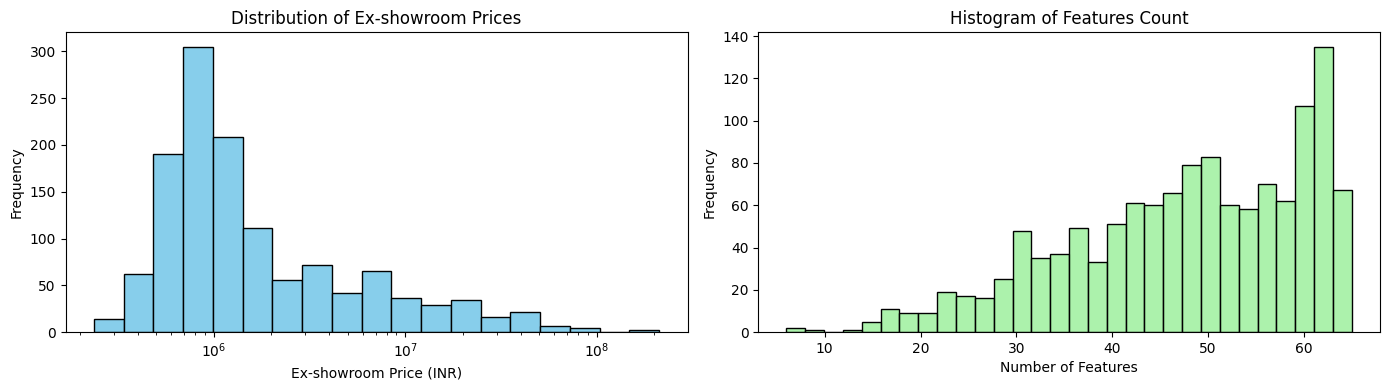

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))


log_bins = np.logspace(np.log10(dataset['ex-showroom_price_inr'].min()), np.log10(dataset['ex-showroom_price_inr'].max()), 20)
axes[0].hist(dataset['ex-showroom_price_inr'], bins=log_bins, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Ex-showroom Prices')
axes[0].set_xlabel('Ex-showroom Price (INR)')
axes[0].set_ylabel('Frequency')
axes[0].set_xscale('log')


sns.histplot(dataset['num_features'], bins=30, color='lightgreen', edgecolor='black', ax=axes[1])
axes[1].set_title('Histogram of Features Count')
axes[1].set_xlabel('Number of Features')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

By observing both the diagram, left side shows that market mainly focuses on affordable car.

where the right side shows the indian market prefers features in the car more.


Bar charts

<ipython-input-228-7ff4ee28d608>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='make', palette='viridis', order=dataset['make'].value_counts().index, ax=axes[0])
<ipython-input-228-7ff4ee28d608>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_diverse_cars, x='model', order=top_diverse_cars['model'].value_counts().index, palette='viridis', ax=axes[1])


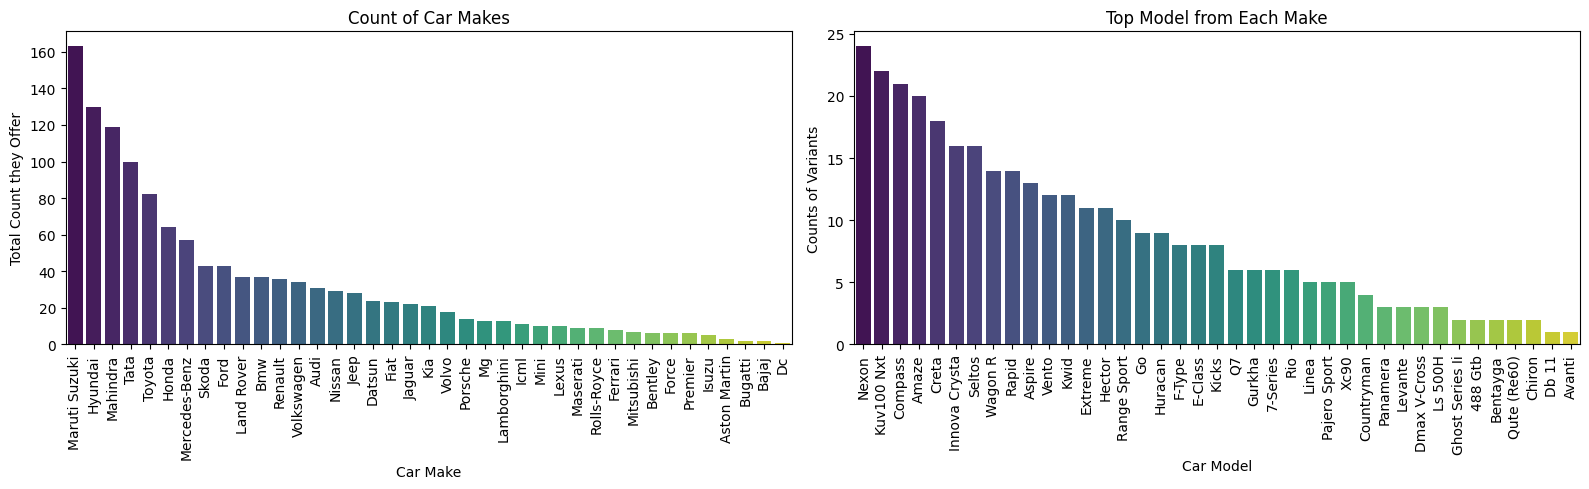

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(data=dataset, x='make', palette='viridis', order=dataset['make'].value_counts().index, ax=axes[0])
axes[0].set_title('Count of Car Makes')
axes[0].set_xlabel('Car Make')
axes[0].set_ylabel('Total Count they Offer')
axes[0].tick_params(axis='x', rotation=90)

top_models_by_make = dataset.groupby('make')['model'].apply(lambda x: x.value_counts().idxmax())

top_diverse_cars = dataset[dataset['model'].isin(top_models_by_make)]

sns.countplot(data=top_diverse_cars, x='model', order=top_diverse_cars['model'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_title('Top Model from Each Make')
axes[1].set_xlabel('Car Model')
axes[1].set_ylabel('Counts of Variants')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

The car company which is higher is Maruti Suzuki because of their cheaper car and services.

The nixon is the top model in each make

Box Plot

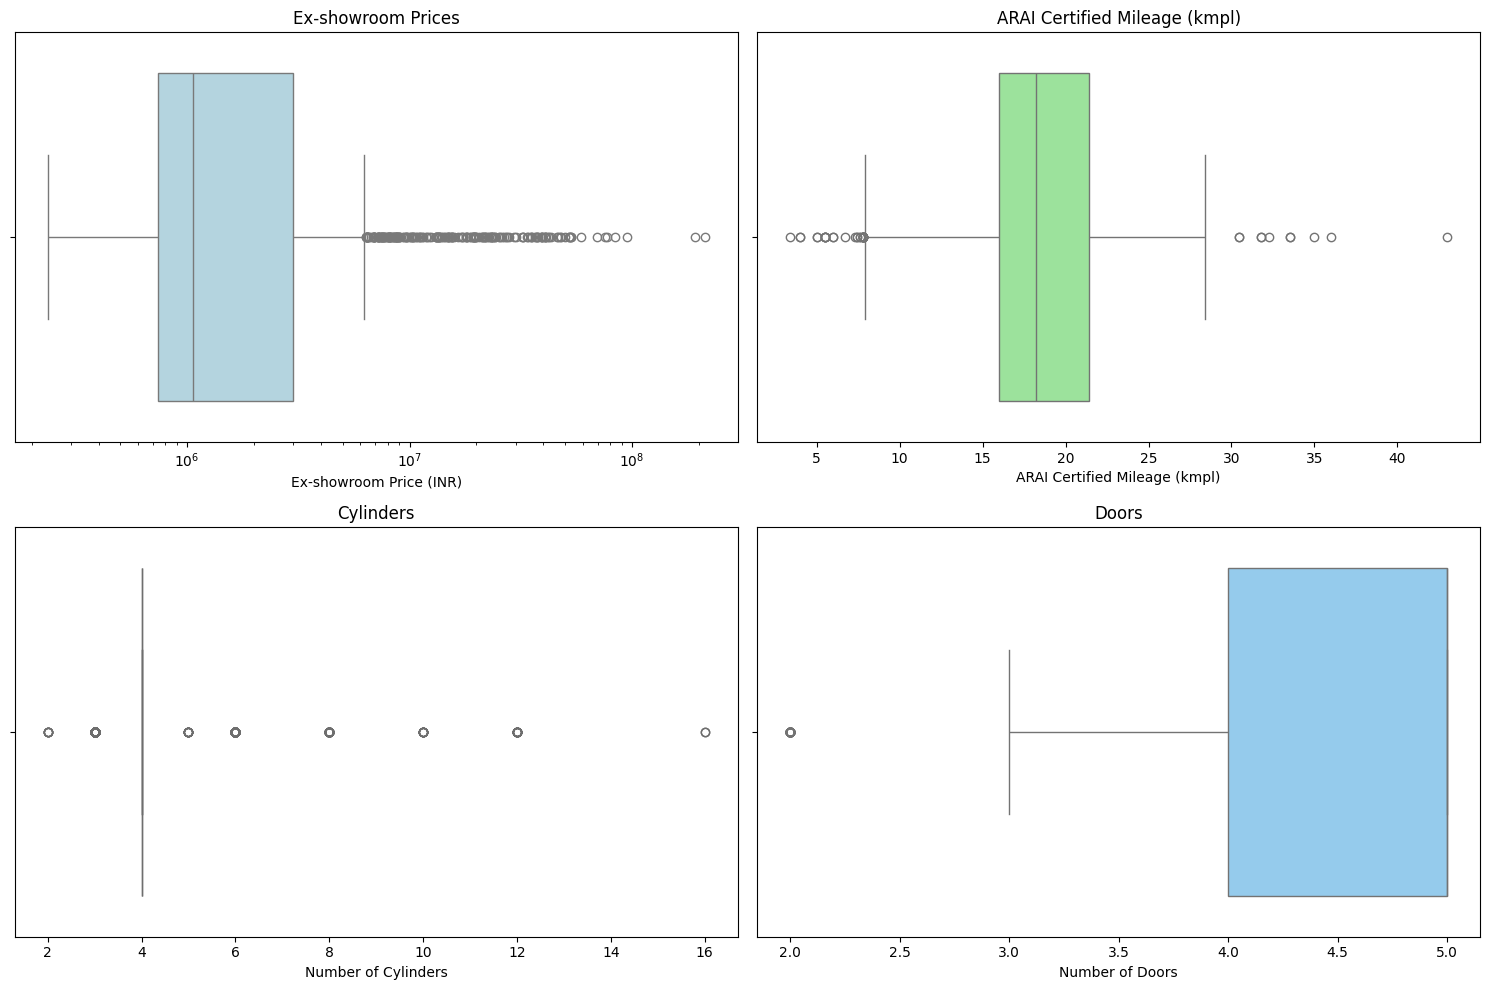

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data=dataset, x='ex-showroom_price_inr', color='lightblue', ax=axes[0, 0])
axes[0, 0].set_xscale('log')
axes[0, 0].set_title('Ex-showroom Prices')
axes[0, 0].set_xlabel('Ex-showroom Price (INR)')

sns.boxplot(data=dataset, x='arai_certified_mileage_kmpl', color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('ARAI Certified Mileage (kmpl)')
axes[0, 1].set_xlabel('ARAI Certified Mileage (kmpl)')

sns.boxplot(data=dataset, x='cylinders', color='lightcoral', ax=axes[1, 0])
axes[1, 0].set_title('Cylinders')
axes[1, 0].set_xlabel('Number of Cylinders')

sns.boxplot(data=dataset, x='doors', color='lightskyblue', ax=axes[1, 1])
axes[1, 1].set_title('Doors')
axes[1, 1].set_xlabel('Number of Doors')

plt.tight_layout()
plt.show()

Pie chart

In [ ]:
def group_small_percentages(data_series, threshold_percent=10):
    percentages = data_series.value_counts(normalize=True) * 100
    mask = percentages >= threshold_percent
    grouped_series = data_series.apply(lambda x: x if mask.get(x, False) else 'Others')
    return grouped_series

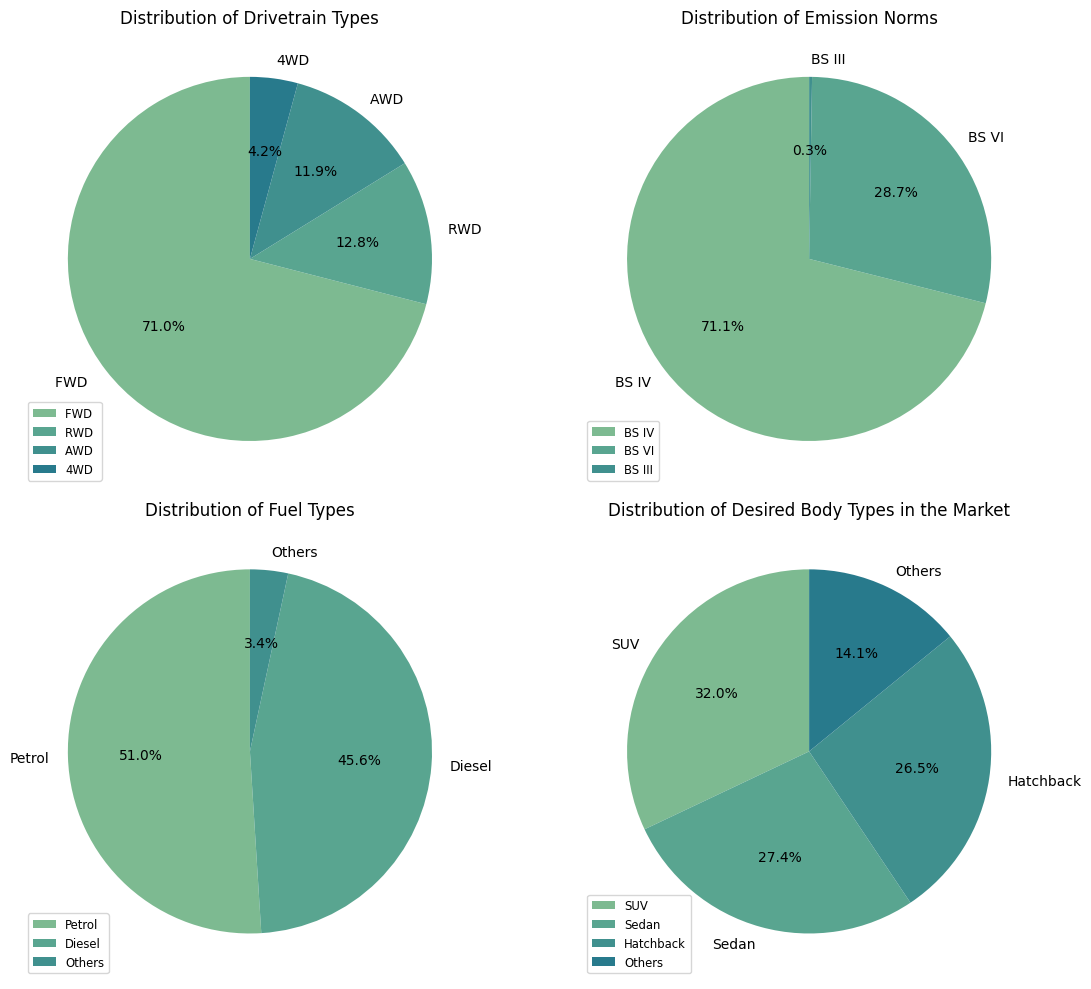

In [ ]:
car_no_unspecified = dataset.replace('unspecified', np.nan).dropna()


plt.figure(figsize=(12, 10))

# Pie chart for Drivetrain
plt.subplot(2, 2, 1)
drivetrain_distribution = car_no_unspecified['drivetrain'].value_counts()
plt.pie(drivetrain_distribution, labels=drivetrain_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('crest'))
plt.title('Distribution of Drivetrain Types')
plt.legend(loc='lower left', fontsize='small')


plt.subplot(2, 2, 2)
emission_norm_distribution = car_no_unspecified['emission_norm'].value_counts()
plt.pie(emission_norm_distribution, labels=emission_norm_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('crest'))
plt.title('Distribution of Emission Norms')
plt.legend(loc='lower left', fontsize='small')

plt.subplot(2, 2, 3)
fuel_type_distribution = group_small_percentages(car_no_unspecified['fuel_type'])
fuel_type_distribution = fuel_type_distribution.value_counts()
plt.pie(fuel_type_distribution, labels=fuel_type_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('crest'))
plt.title('Distribution of Fuel Types')
plt.legend(loc='lower left', fontsize='small')

plt.subplot(2, 2, 4)
body_type_distribution = group_small_percentages(car_no_unspecified['body_type'])
body_type_distribution = body_type_distribution.value_counts()
plt.pie(body_type_distribution, labels=body_type_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('crest'))
plt.title('Distribution of Desired Body Types in the Market')
plt.legend(loc='lower left', fontsize='small')

plt.tight_layout()
plt.show()

Count Plots

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Count plot for drivetrain
sns.countplot(data=dataset_no_unspecified, x='drivetrain', ax=axes[0, 0], palette='viridis', order=dataset_no_unspecified['drivetrain'].value_counts().index, width=0.5)
axes[0, 0].set_title('Count of Cars by Drivetrain')
axes[0, 0].set_xlabel('Drivetrain')
axes[0, 0].set_yscale('log')

# Count plot for fuel type
sns.countplot(data=dataset_no_unspecified, x='fuel_type', ax=axes[0, 1], palette='viridis', order=dataset_no_unspecified['fuel_type'].value_counts().index, width=0.5)
axes[0, 1].set_title('Count of Cars by Fuel Type')
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].set_xlabel('Fuel Type')
axes[0, 1].set_yscale('log')

# Count plot for cylinder configuration
sns.countplot(data=dataset_no_unspecified, x='cylinder_configuration', ax=axes[0, 2], palette='viridis', order=dataset_no_unspecified['cylinder_configuration'].value_counts().index, width=0.5)
axes[0, 2].set_title('Count of Cars by Cylinder Configuration')
axes[0, 2].set_xlabel('Cylinder Configuration')
axes[0, 2].set_yscale('log')

# Count plot for engine location
sns.countplot(data=dataset_no_unspecified, x='engine_location', ax=axes[1, 0], palette='viridis', order=dataset_no_unspecified['engine_location'].value_counts().index, width=0.5)
axes[1, 0].set_title('Count of Cars by Engine Location')
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].set_xlabel('Engine Location')
axes[1, 0].set_yscale('log')

# Count plot for doors
sns.countplot(data=dataset_no_unspecified, x='doors', ax=axes[1, 1], palette='viridis', order=dataset_no_unspecified['doors'].value_counts().index, width=0.5)
axes[1, 1].set_title('Count of Cars by Number of Doors')
axes[1, 1].set_xlabel('Number of Doors')
axes[1, 1].set_yscale('log')


sns.countplot(data=dataset_no_unspecified, x='gears', ax=axes[1, 2], palette='viridis', order=dataset_no_unspecified['gears'].value_counts().index, width=0.5)
axes[1, 2].set_title('Count of Cars by Number of Gears')
axes[1, 2].set_xlabel('Number of Gears')
axes[1, 2].set_yscale('log')


sns.countplot(data=dataset_no_unspecified, x='type', ax=axes[2, 0], palette='viridis', order=dataset_no_unspecified['type'].value_counts().index, width=0.5)
axes[2, 0].set_title('Count of Cars by Transmission Type')
axes[2, 0].set_xlabel('Transmission Type')
axes[2, 0].set_yscale('log')


sns.countplot(data=filtered_dataset, x='body_type', ax=axes[2, 1], palette='viridis', order=filtered_dataset['body_type'].value_counts().index, width=0.5)
axes[2, 1].set_title('Count of Cars by Body Type')
axes[2, 1].tick_params(axis='x', rotation=90)
axes[2, 1].set_xlabel('Body Type')
axes[2, 1].set_yscale('log')


axes[2, 2].axis('off')

plt.tight_layout()
plt.show()


<ipython-input-233-3376a876e00b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_no_unspecified, x='drivetrain', ax=axes[0, 0], palette='viridis', order=car_no_unspecified['drivetrain'].value_counts().index, width=0.5)
<ipython-input-233-3376a876e00b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_no_unspecified, x='fuel_type', ax=axes[0, 1], palette='viridis', order=car_no_unspecified['fuel_type'].value_counts().index, width=0.5)
<ipython-input-233-3376a876e00b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(d

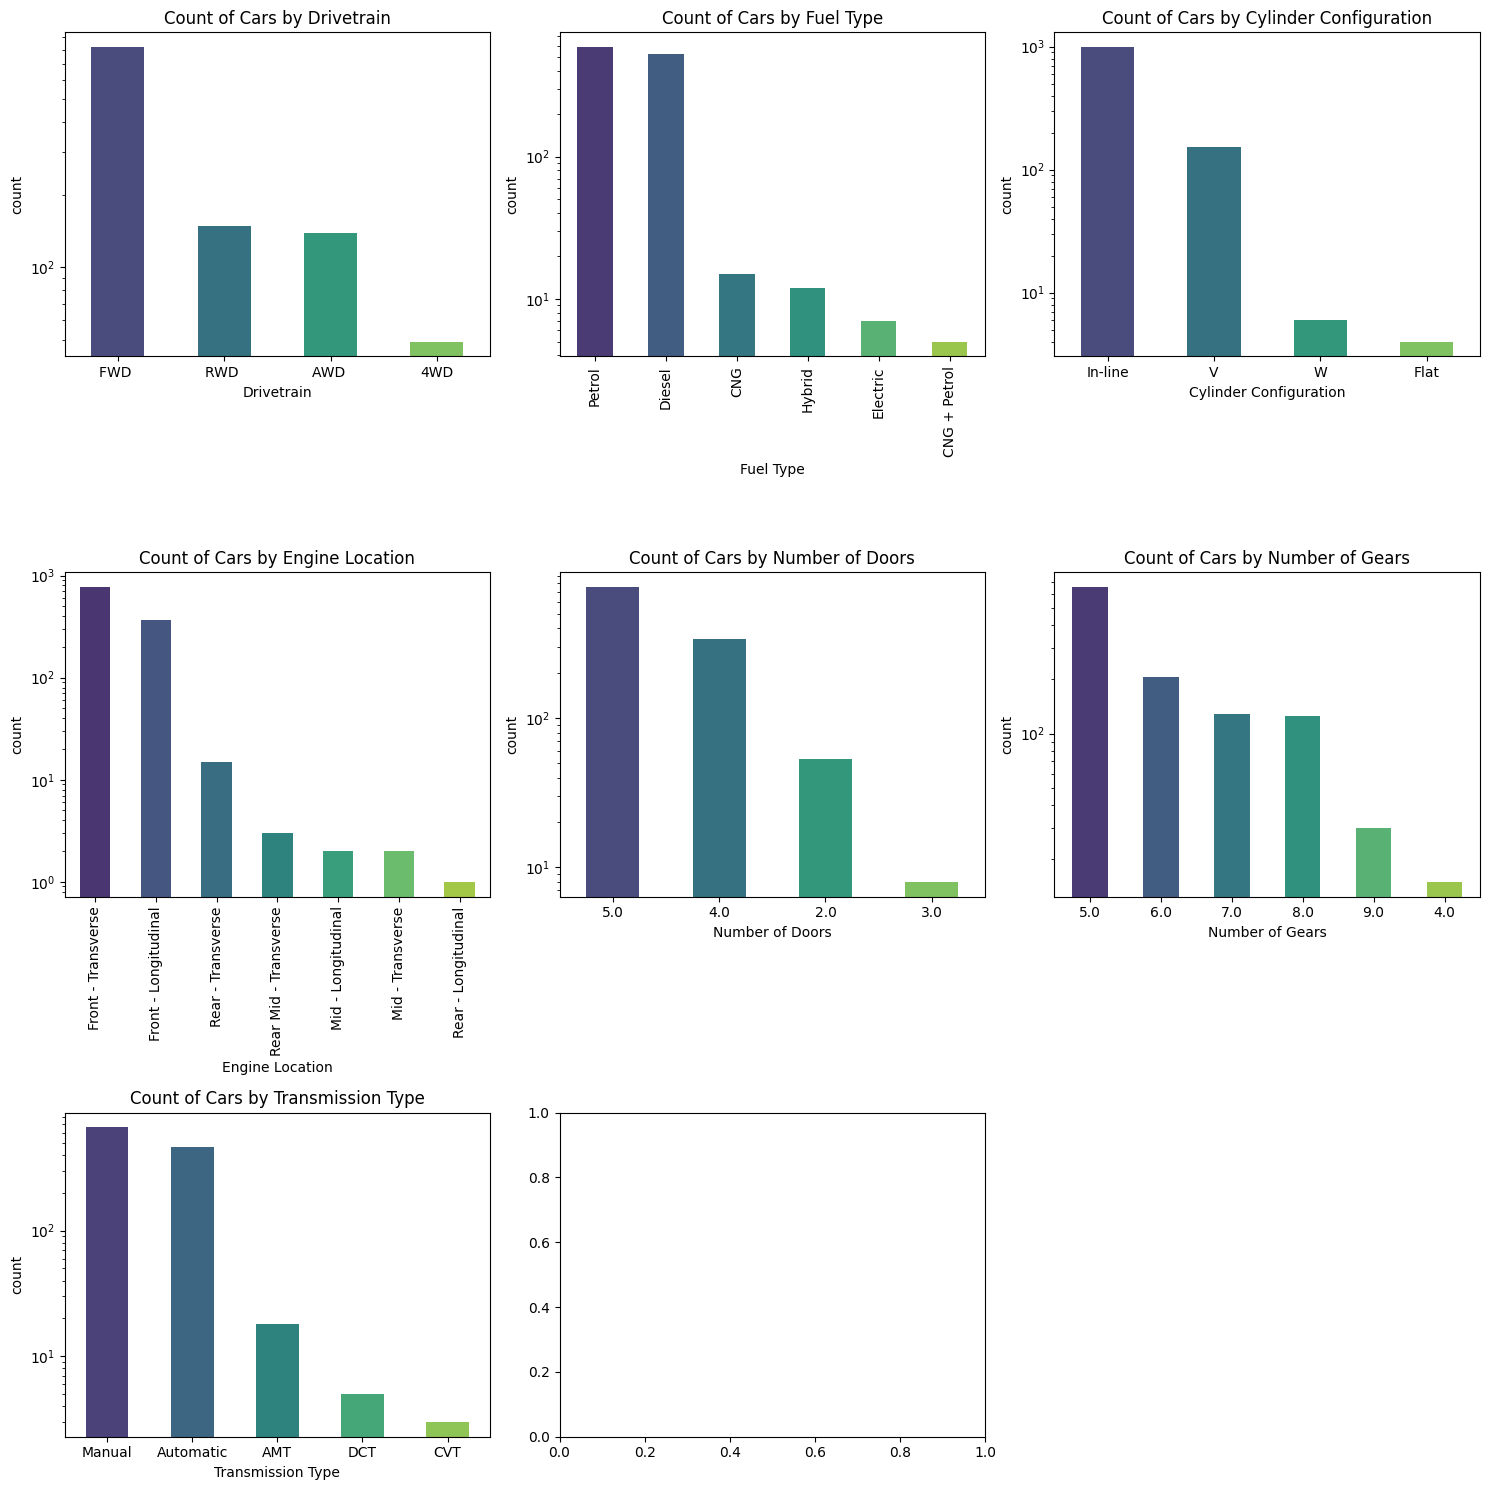

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Count plot for drivetrain
sns.countplot(data=car_no_unspecified, x='drivetrain', ax=axes[0, 0], palette='viridis', order=car_no_unspecified['drivetrain'].value_counts().index, width=0.5)
axes[0, 0].set_title('Count of Cars by Drivetrain')
axes[0, 0].set_xlabel('Drivetrain')
axes[0, 0].set_yscale('log')

# Count plot for fuel type
sns.countplot(data=car_no_unspecified, x='fuel_type', ax=axes[0, 1], palette='viridis', order=car_no_unspecified['fuel_type'].value_counts().index, width=0.5)
axes[0, 1].set_title('Count of Cars by Fuel Type')
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].set_xlabel('Fuel Type')
axes[0, 1].set_yscale('log')

# Count plot for cylinder configuration
sns.countplot(data=car_no_unspecified, x='cylinder_configuration', ax=axes[0, 2], palette='viridis', order=car_no_unspecified['cylinder_configuration'].value_counts().index, width=0.5)
axes[0, 2].set_title('Count of Cars by Cylinder Configuration')
axes[0, 2].set_xlabel('Cylinder Configuration')
axes[0, 2].set_yscale('log')

# Count plot for engine location
sns.countplot(data=car_no_unspecified, x='engine_location', ax=axes[1, 0], palette='viridis', order=car_no_unspecified['engine_location'].value_counts().index, width=0.5)
axes[1, 0].set_title('Count of Cars by Engine Location')
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].set_xlabel('Engine Location')
axes[1, 0].set_yscale('log')

# Count plot for doors
sns.countplot(data=car_no_unspecified, x='doors', ax=axes[1, 1], palette='viridis', order=car_no_unspecified['doors'].value_counts().index, width=0.5)
axes[1, 1].set_title('Count of Cars by Number of Doors')
axes[1, 1].set_xlabel('Number of Doors')
axes[1, 1].set_yscale('log')

# Count plot for gears
sns.countplot(data=car_no_unspecified, x='gears', ax=axes[1, 2], palette='viridis', order=car_no_unspecified['gears'].value_counts().index, width=0.5)
axes[1, 2].set_title('Count of Cars by Number of Gears')
axes[1, 2].set_xlabel('Number of Gears')
axes[1, 2].set_yscale('log')

# Count plot for type
sns.countplot(data=car_no_unspecified, x='type', ax=axes[2, 0], palette='viridis', order=car_no_unspecified['type'].value_counts().index, width=0.5)
axes[2, 0].set_title('Count of Cars by Transmission Type')
axes[2, 0].set_xlabel('Transmission Type')
axes[2, 0].set_yscale('log')


# Hide the empty subplot in the last row and last column
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()

# Data visualization: Bivariate

In [ ]:
dimension_subset = dataset[['height_mm', 'length_mm', 'width_mm', 'kerb_weight_kg', 'ground_clearance_mm']].corr()

dimension_subset

,height_mm,length_mm,width_mm,kerb_weight_kg,ground_clearance_mm
height_mm,1.000000,0.149319,0.201726,-0.043271,0.204272
length_mm,0.149319,1.000000,0.757496,-0.061920,0.166463
width_mm,0.201726,0.757496,1.000000,-0.058706,0.288543
kerb_weight_kg,-0.043271,-0.061920,-0.058706,1.000000,-0.012163
ground_clearance_mm,0.204272,0.166463,0.288543,-0.012163,1.000000


In [ ]:
correlation_matrix_tire = dataset[['front_track_mm', 'rear_track_mm', 'f_tire_diameter_inch', 'f_tire_aspect_ratio',
                               'f_tire_width_mm', 'r_tire_diameter_inch', 'r_tire_aspect_ratio', 'r_tire_width_mm']].corr()

correlation_matrix_tire

ValueError: could not convert string to float: 'Yes'

Scatter plots

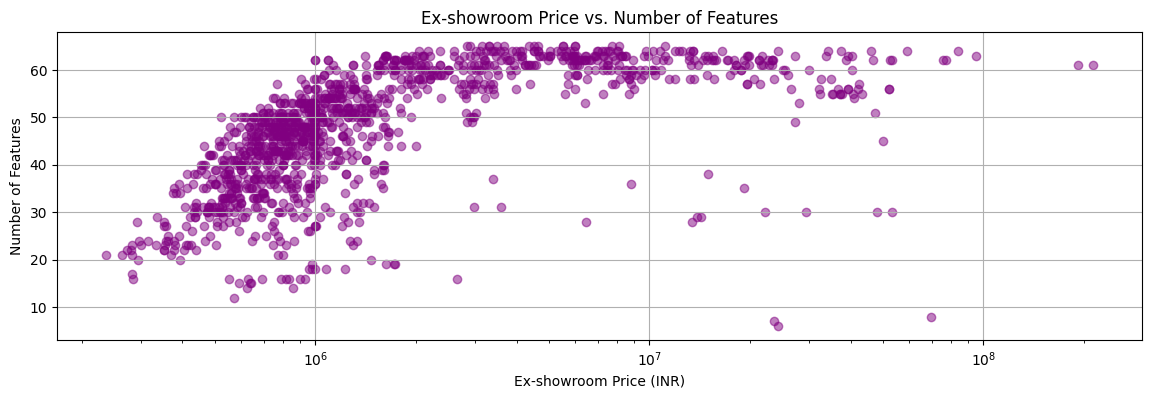

In [ ]:
plt.figure(figsize=(14, 4))
plt.scatter(dataset['ex-showroom_price_inr'], dataset['num_features'], alpha=0.5, c='purple')
plt.title('Ex-showroom Price vs. Number of Features')
plt.xlabel('Ex-showroom Price (INR)')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.grid(True)
plt.show()

<ipython-input-237-9dbf694115e8>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='make', y='ex-showroom_price_inr', data=dataset, palette='viridis', ax=axs[0, 0])


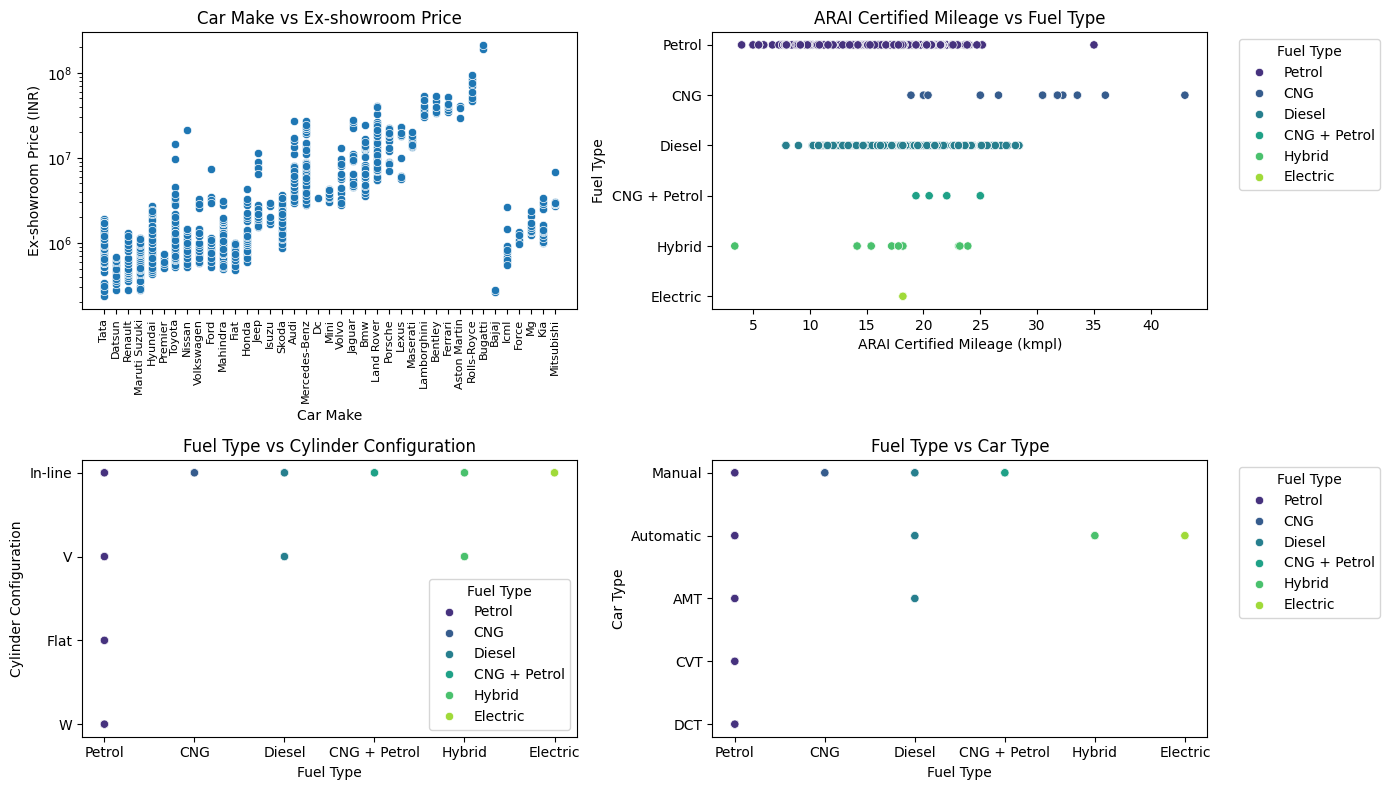

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Scatter plot between car make and ex-showroom price
sns.scatterplot(x='make', y='ex-showroom_price_inr', data=dataset, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Car Make vs Ex-showroom Price')
axs[0, 0].set_xlabel('Car Make')
axs[0, 0].set_ylabel('Ex-showroom Price (INR)')
axs[0, 0].set_yscale('log')
axs[0, 0].tick_params(axis='x', rotation=90,labelsize=8)

# Scatter plot between ARAI certified mileage and fuel type
sns.scatterplot(x='arai_certified_mileage_kmpl', y='fuel_type', data=dataset, hue='fuel_type', palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('ARAI Certified Mileage vs Fuel Type')
axs[0, 1].set_xlabel('ARAI Certified Mileage (kmpl)')
axs[0, 1].set_ylabel('Fuel Type')
axs[0, 1].legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter plot between fuel type and cylinder configuration
sns.scatterplot(x='fuel_type', y='cylinder_configuration', data=car_no_unspecified, hue='fuel_type', palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Fuel Type vs Cylinder Configuration')
axs[1, 0].set_xlabel('Fuel Type')
axs[1, 0].set_ylabel('Cylinder Configuration')
axs[1, 0].legend(title='Fuel Type')

# Scatter plot between fuel type and car type
sns.scatterplot(x='fuel_type', y='type', data=car_no_unspecified, hue='fuel_type', palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Fuel Type vs Car Type')
axs[1, 1].set_xlabel('Fuel Type')
axs[1, 1].set_ylabel('Car Type')
axs[1, 1].legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Pair plot

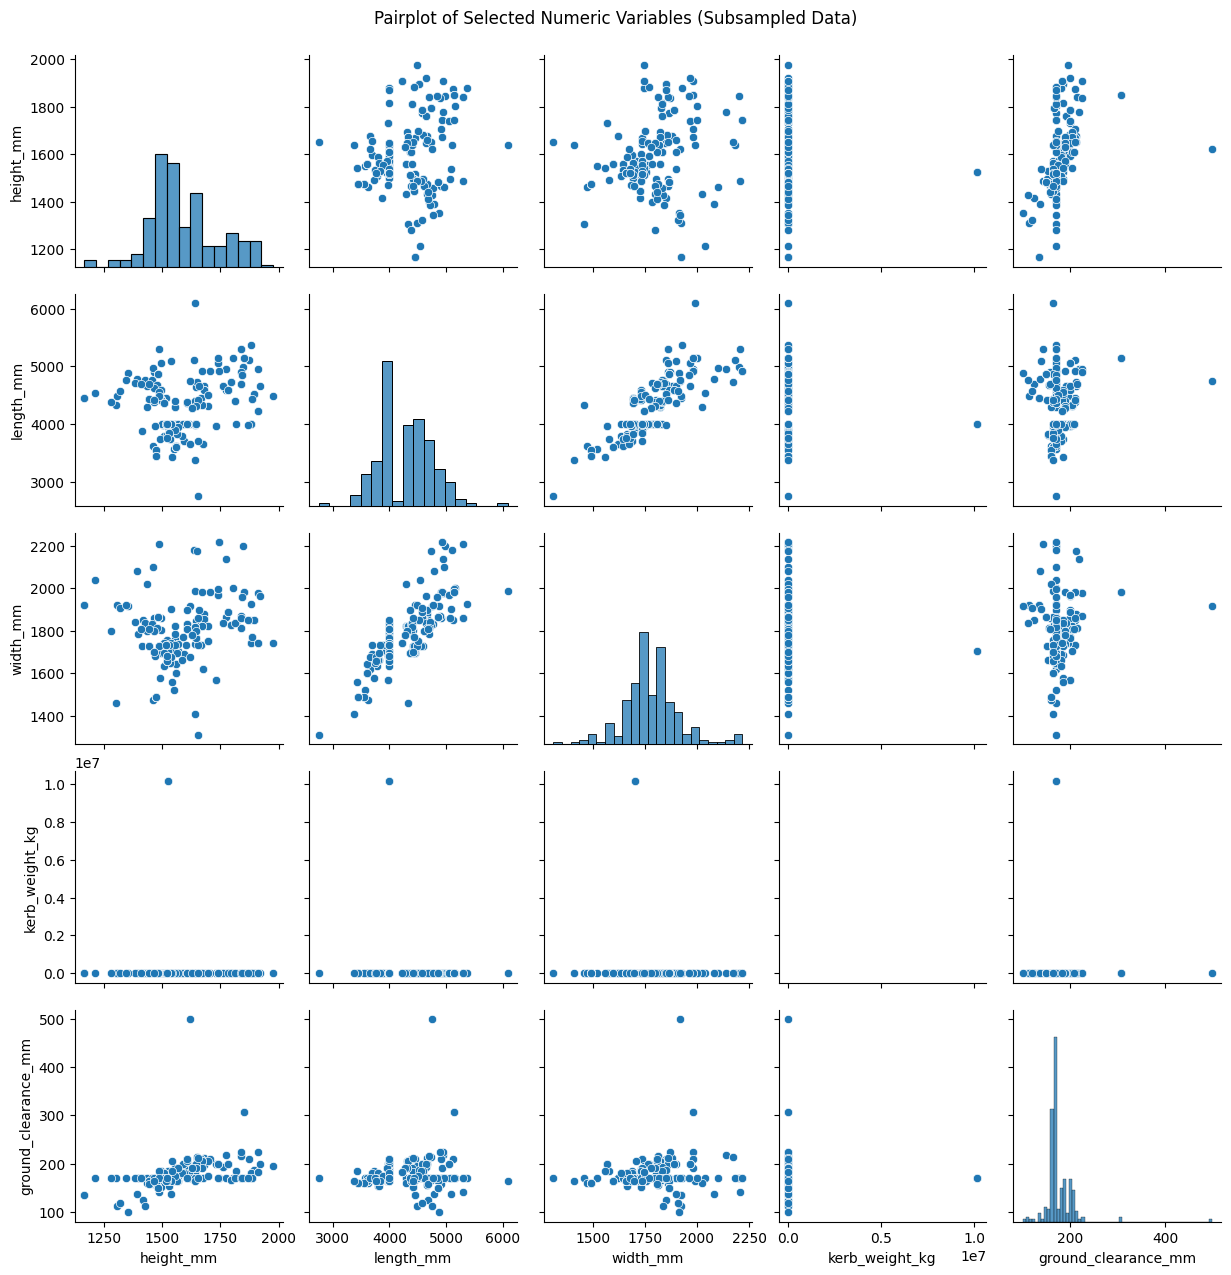

In [ ]:
selected_numeric_variables = ['height_mm', 'length_mm', 'width_mm', 'kerb_weight_kg', 'ground_clearance_mm']

subsampled_data = dataset.sample(frac=0.2, random_state=42)

sns.pairplot(subsampled_data[selected_numeric_variables])
plt.suptitle('Pairplot of Selected Numeric Variables (Subsampled Data)', y=1.02)
plt.show()

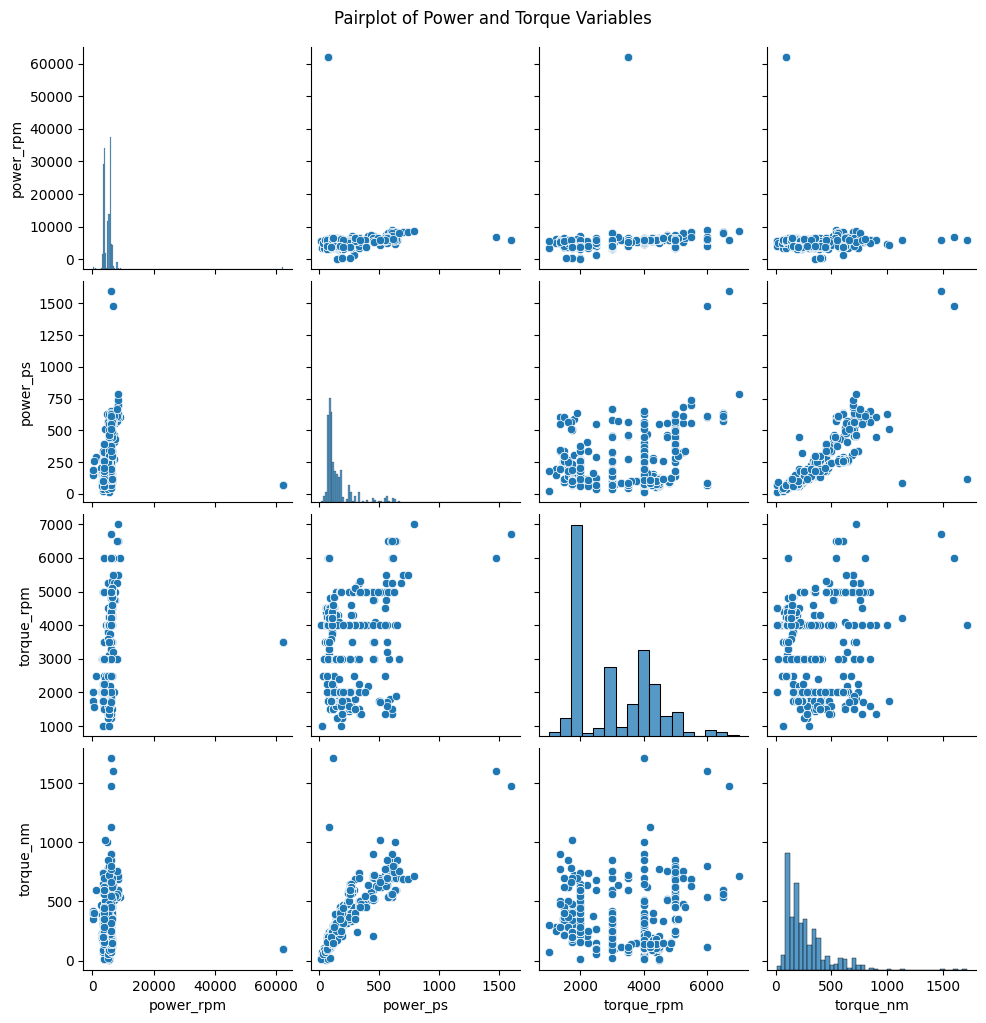

In [ ]:
selected_power_torque_variables = ['power_rpm', 'power_ps', 'torque_rpm', 'torque_nm']

sns.pairplot(dataset[selected_power_torque_variables])
plt.suptitle('Pairplot of Power and Torque Variables', y=1.02)
plt.show()

Bar chart

<ipython-input-241-2ef286d78a99>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_expensive_models, x='model', y='num_features', palette='viridis', width=0.5 , ax=axes[1])
<ipython-input-241-2ef286d78a99>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cheapest_models, x='model', y='num_features', palette='viridis', width=0.5, ax=axes[2])


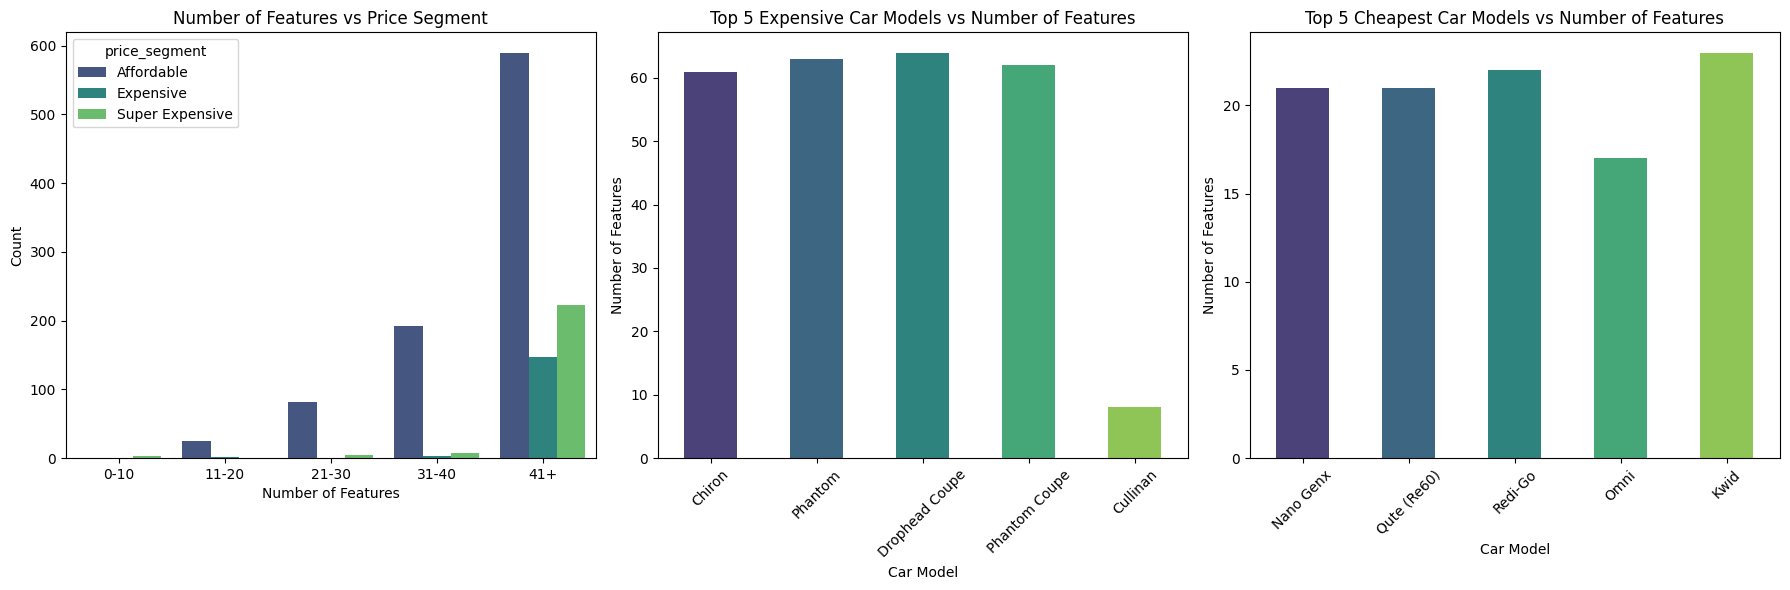

In [ ]:
feature_bins = [0, 10, 20, 30, 40, float('inf')]
feature_labels = ['0-10', '11-20', '21-30', '31-40', '41+']
dataset['feature_bins'] = pd.cut(dataset['num_features'], bins=feature_bins, labels=feature_labels, right=False)

# Find the top 5 unique car models with the highest ex-showroom prices
top_expensive_models = dataset.sort_values(by='ex-showroom_price_inr', ascending=False).drop_duplicates(subset='model').head(5)

# Find the top 5 unique car models with the lowest ex-showroom prices
top_cheapest_models = dataset.sort_values(by='ex-showroom_price_inr', ascending=True).drop_duplicates(subset='model').head(5)

# Create a 1x3 matrix of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first chart (Number of Features vs Price Segment)
sns.countplot(data=dataset, x='feature_bins', hue='price_segment', palette='viridis', ax=axes[0])
axes[0].set_title('Number of Features vs Price Segment')
axes[0].set_xlabel('Number of Features')
axes[0].set_ylabel('Count')

# Plot the second chart (Top 5 Expensive Car Models vs Number of Features)
sns.barplot(data=top_expensive_models, x='model', y='num_features', palette='viridis', width=0.5 , ax=axes[1])
axes[1].set_title('Top 5 Expensive Car Models vs Number of Features')
axes[1].set_xlabel('Car Model')
axes[1].set_ylabel('Number of Features')
axes[1].tick_params(axis='x', rotation=45)

# Plot the third chart (Top 5 Cheapest Car Models vs Number of Features)
sns.barplot(data=top_cheapest_models, x='model', y='num_features', palette='viridis', width=0.5, ax=axes[2])
axes[2].set_title('Top 5 Cheapest Car Models vs Number of Features')
axes[2].set_xlabel('Car Model')
axes[2].set_ylabel('Number of Features')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-242-d119a1fafc84>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=dataset, x='fuel_type', y='arai_certified_mileage_kmpl', hue='fuel_type', ci=False, palette='viridis', dodge=False, order=sorted_data, width=0.5)


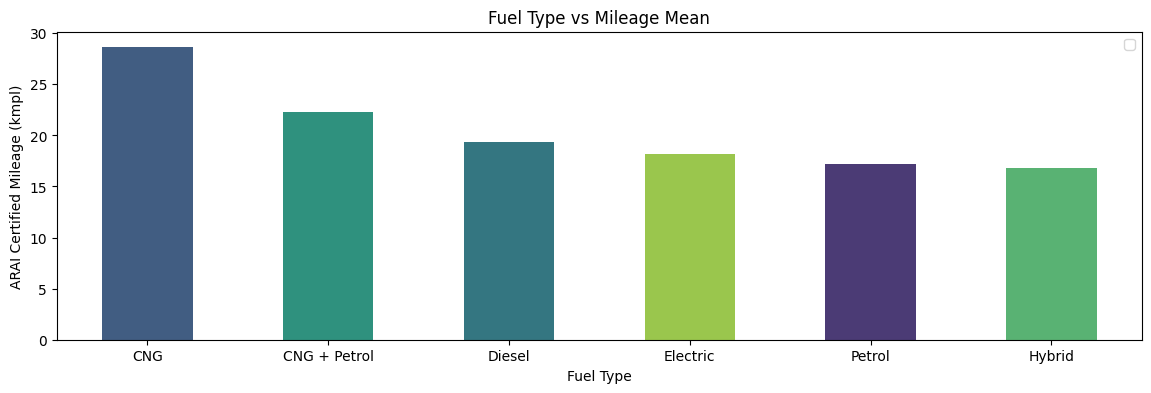

In [ ]:
sorted_data = dataset.groupby('fuel_type')['arai_certified_mileage_kmpl'].mean().sort_values(ascending=False).index

# Bar chart with hue for Fuel Type vs Mileage mean
plt.figure(figsize=(14, 4))
sns.barplot(data=dataset, x='fuel_type', y='arai_certified_mileage_kmpl', hue='fuel_type', ci=False, palette='viridis', dodge=False, order=sorted_data, width=0.5)
plt.title('Fuel Type vs Mileage Mean')
plt.xlabel('Fuel Type')
plt.ylabel('ARAI Certified Mileage (kmpl)')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.show()

<ipython-input-243-0a8fa3f74567>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(ax=axes[0], data=filtered_car, x='wheelbase_mm', y='body_type', hue='body_type', ci=False, palette='viridis', dodge=False, order=order_body_types_wheelbase)
<ipython-input-243-0a8fa3f74567>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(ax=axes[1], data=filtered_car, x='arai_certified_mileage_kmpl', y='body_type', hue='body_type', ci=False, palette='viridis', dodge=False, order=order_body_types_mileage)
<ipython-input-243-0a8fa3f74567>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(ax=axes[2], data=filtered_car, x='ex-showroom_price_inr', y='body_type',hue='body_type', ci=False, palette='viridis', dodge=False, order=order_body_types_price)


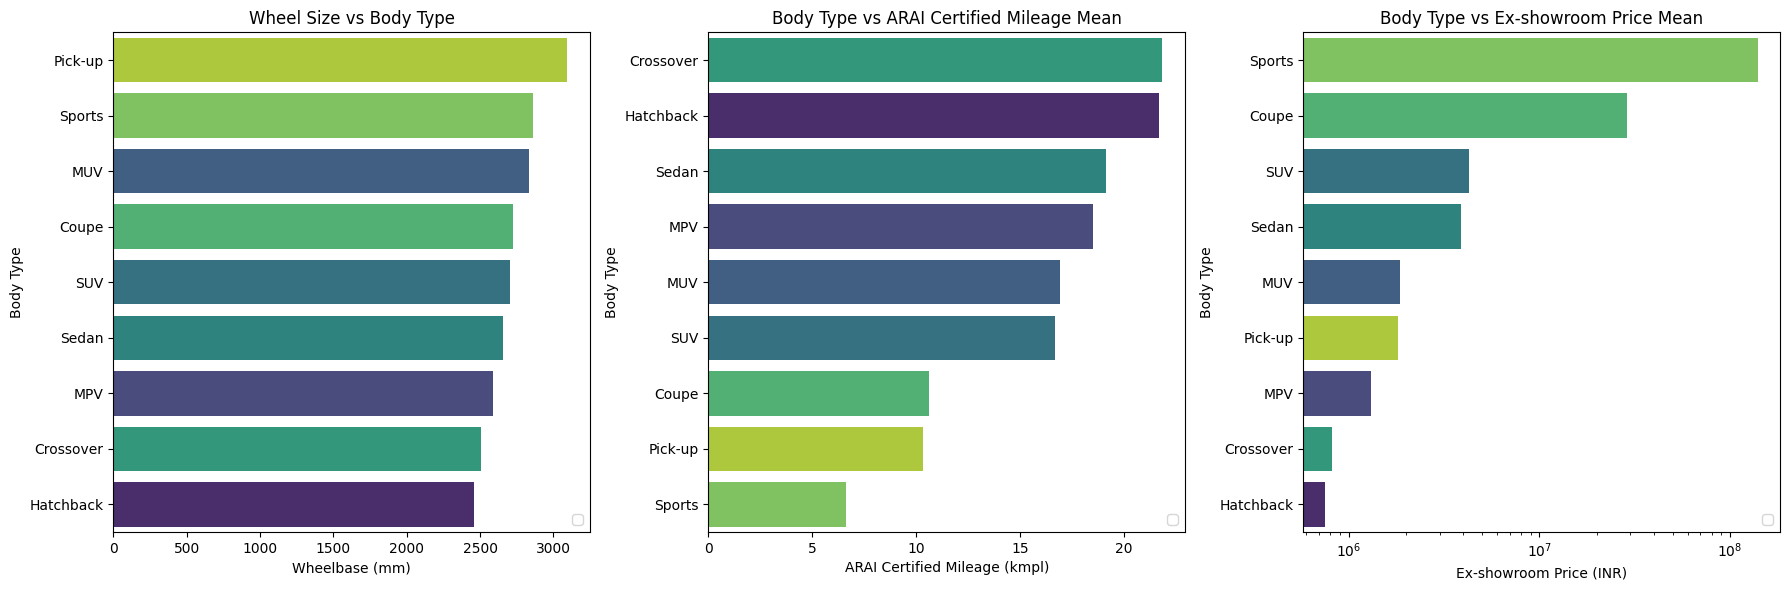

In [ ]:
desired_body_types = ['Coupe', 'Crossover', 'Hatchback', 'MPV', 'MUV', 'Pick-up', 'Sedan', 'Sports', 'SUV']

# Filter the DataFrame to include only the desired body types
filtered_car = dataset[dataset['body_type'].isin(desired_body_types)]

# Order the body types by mean wheelbase in descending order
order_body_types_wheelbase = filtered_car.groupby('body_type')['wheelbase_mm'].mean().sort_values(ascending=False).index

# Order the body types by mean ARAI Certified Mileage in descending order
order_body_types_mileage = filtered_car.groupby('body_type')['arai_certified_mileage_kmpl'].mean().sort_values(ascending=False).index

# Order the body types by mean Ex-showroom Price in descending order
order_body_types_price = filtered_car.groupby('body_type')['ex-showroom_price_inr'].mean().sort_values(ascending=False).index

# Create a 1x3 matrix for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar chart with hue for Wheel Size vs Body Type
sns.barplot(ax=axes[0], data=filtered_car, x='wheelbase_mm', y='body_type', hue='body_type', ci=False, palette='viridis', dodge=False, order=order_body_types_wheelbase)
axes[0].set_title('Wheel Size vs Body Type')
axes[0].set_xlabel('Wheelbase (mm)')
axes[0].set_ylabel('Body Type')
axes[0].legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))

# Bar chart for Body Type vs ARAI Certified Mileage mean
sns.barplot(ax=axes[1], data=filtered_car, x='arai_certified_mileage_kmpl', y='body_type', hue='body_type', ci=False, palette='viridis', dodge=False, order=order_body_types_mileage)
axes[1].set_title('Body Type vs ARAI Certified Mileage Mean')
axes[1].set_xlabel('ARAI Certified Mileage (kmpl)')
axes[1].set_ylabel('Body Type')
axes[1].legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))

# Bar chart for Body Type vs Ex-showroom Price mean with log scale on x-axis
sns.barplot(ax=axes[2], data=filtered_car, x='ex-showroom_price_inr', y='body_type',hue='body_type', ci=False, palette='viridis', dodge=False, order=order_body_types_price)
axes[2].set_xscale('log')
axes[2].set_title('Body Type vs Ex-showroom Price Mean')
axes[2].set_xlabel('Ex-showroom Price (INR)')
axes[2].set_ylabel('Body Type')
axes[2].legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()

HeatMap

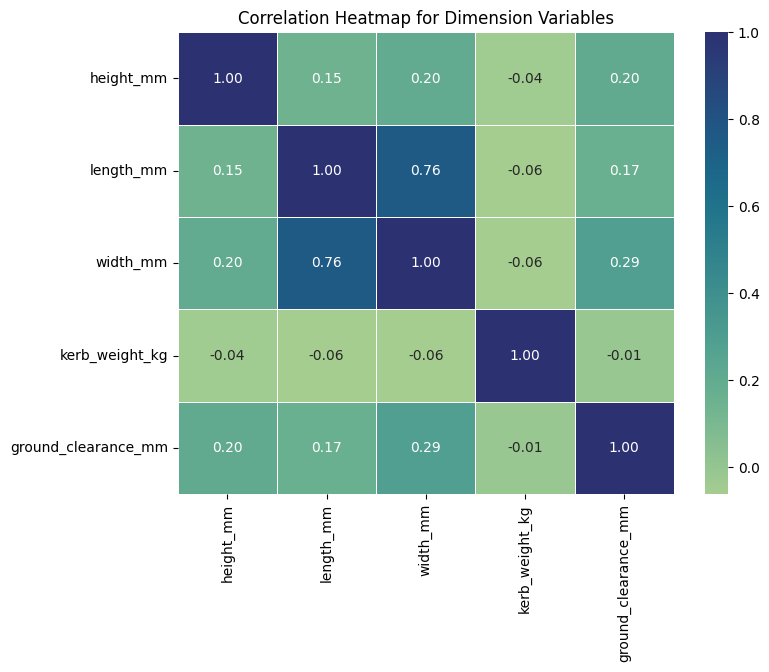

In [ ]:
dimension_subset = dataset[['height_mm', 'length_mm', 'width_mm', 'kerb_weight_kg', 'ground_clearance_mm']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(dimension_subset, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Dimension Variables')
plt.show()

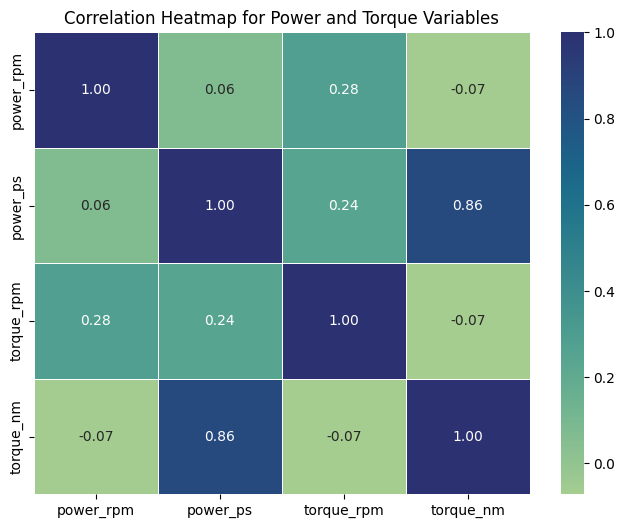

In [ ]:
correlation_matrix_power_torque = dataset[['power_rpm', 'power_ps', 'torque_rpm', 'torque_nm']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_power_torque, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Power and Torque Variables')
plt.show()

Join plots

<ipython-input-247-a7042c1485d8>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_car['log_price'] = np.log1p(filtered_car['ex-showroom_price_inr'])
<ipython-input-247-a7042c1485d8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_car['log_price'] = np.log1p(filtered_car['ex-showroom_price_inr'])


<Figure size 800x600 with 0 Axes>

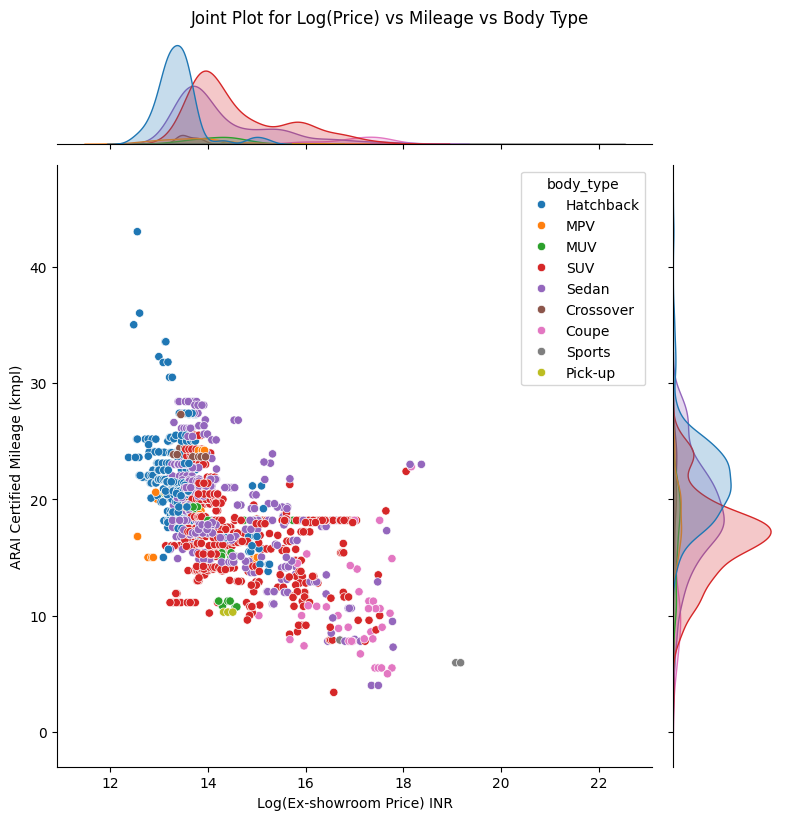

<ipython-input-247-a7042c1485d8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_car.drop('log_price', axis=1, inplace=True)


In [ ]:
desired_body_types = ['Coupe', 'Crossover', 'Hatchback', 'MPV', 'MUV', 'Pick-up', 'Sedan', 'Sports', 'SUV']

# Filter the DataFrame to include only the desired body types
filtered_car = dataset[dataset['body_type'].isin(desired_body_types)]

# Joint plot for Price vs Mileage vs Body type
plt.figure(figsize=(8, 6))
filtered_car['log_price'] = np.log1p(filtered_car['ex-showroom_price_inr'])

joint_plot = sns.jointplot(data=filtered_car, x='log_price', y='arai_certified_mileage_kmpl', hue='body_type', height=8)
joint_plot.set_axis_labels('Log(Ex-showroom Price) INR', 'ARAI Certified Mileage (kmpl)')
joint_plot.fig.suptitle('Joint Plot for Log(Price) vs Mileage vs Body Type', y=1.02)
plt.show()

# Remove the temporary log_price column
filtered_car.drop('log_price', axis=1, inplace=True)

Box plots

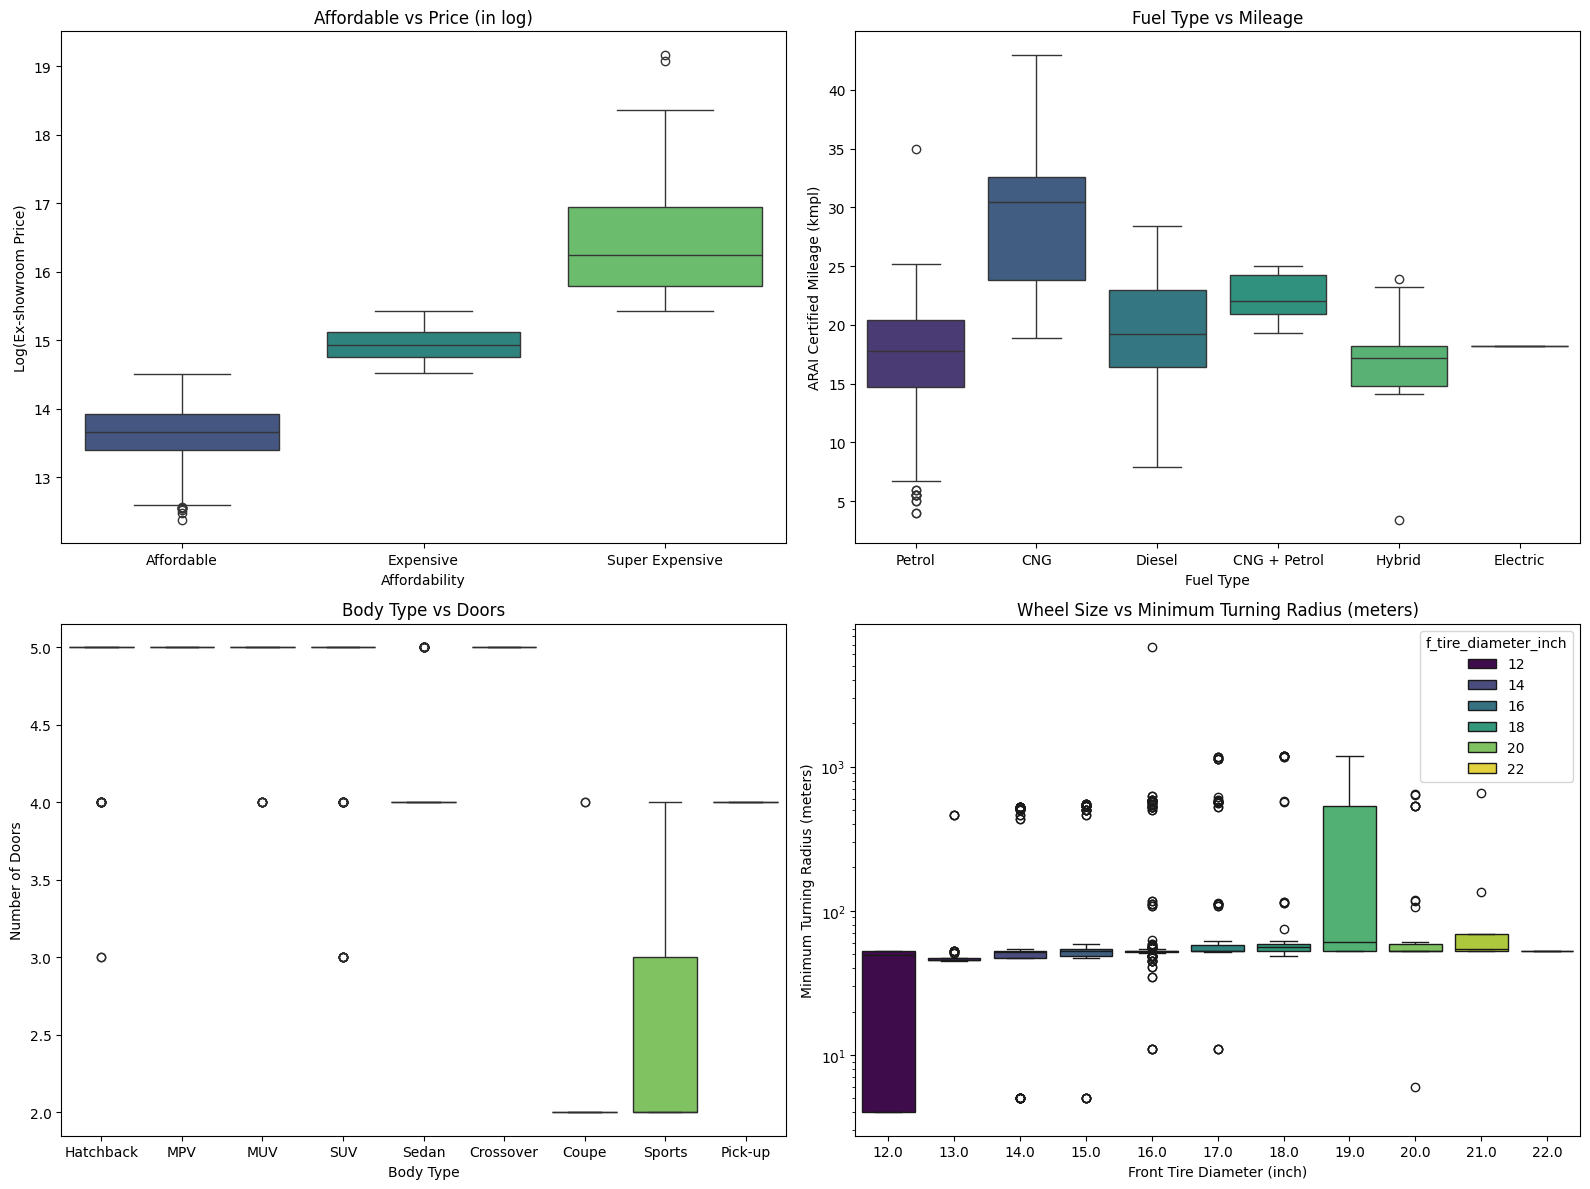

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

desired_body_types = ['Coupe', 'Crossover', 'Hatchback', 'MPV', 'MUV', 'Pick-up', 'Sedan', 'Sports', 'SUV']

# Filter the DataFrame to include only the desired body types
filtered_car = dataset[dataset['body_type'].isin(desired_body_types)]

# Order the body types by mean wheelbase in descending order
order_body_types_wheelbase = filtered_car.groupby('body_type')['wheelbase_mm'].mean().sort_values(ascending=False).index

# 1. Affordable vs Price (in log)
sns.boxplot(data=dataset, x='price_segment', y=np.log1p(dataset['ex-showroom_price_inr']), hue='price_segment', palette='viridis', dodge=False, ax=axes[0, 0])
axes[0, 0].set_title('Affordable vs Price (in log)')
axes[0, 0].set_xlabel('Affordability')
axes[0, 0].set_ylabel('Log(Ex-showroom Price)')

# 2. Fuel Type vs Mileage
sns.boxplot(data=dataset, x='fuel_type', y='arai_certified_mileage_kmpl', hue='fuel_type', palette='viridis', dodge=False, ax=axes[0, 1])
axes[0, 1].set_title('Fuel Type vs Mileage')
axes[0, 1].set_xlabel('Fuel Type')
axes[0, 1].set_ylabel('ARAI Certified Mileage (kmpl)')

# 3. Body Type vs Doors (corrected line)
sns.boxplot(data=filtered_car, x='body_type', y='doors', hue='body_type', palette='viridis', dodge=False, ax=axes[1, 0])
axes[1, 0].set_title('Body Type vs Doors')
axes[1, 0].set_xlabel('Body Type')
axes[1, 0].set_ylabel('Number of Doors')

# 4. Wheel Size vs minimum_turning_radius_meter (with y-axis in log scale)
sns.boxplot(data=dataset, x='f_tire_diameter_inch', y='minimum_turning_radius_meter', hue='f_tire_diameter_inch', palette='viridis', dodge=False, ax=axes[1, 1])
axes[1, 1].set_title('Wheel Size vs Minimum Turning Radius (meters)')
axes[1, 1].set_xlabel('Front Tire Diameter (inch)')
axes[1, 1].set_ylabel('Minimum Turning Radius (meters)')
axes[1, 1].set_yscale('log')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Categorical plots

<ipython-input-252-9d53ab55d76b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_car, x='body_type', palette='viridis', order=order_body_types_count, width=0.5, ax=axes[0, 0])
<ipython-input-252-9d53ab55d76b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='doors', palette='viridis', order=dataset['doors'].value_counts().sort_values(ascending=False).index, width=0.5, ax=axes[0, 1])
<ipython-input-252-9d53ab55d76b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='gears', palette='virid

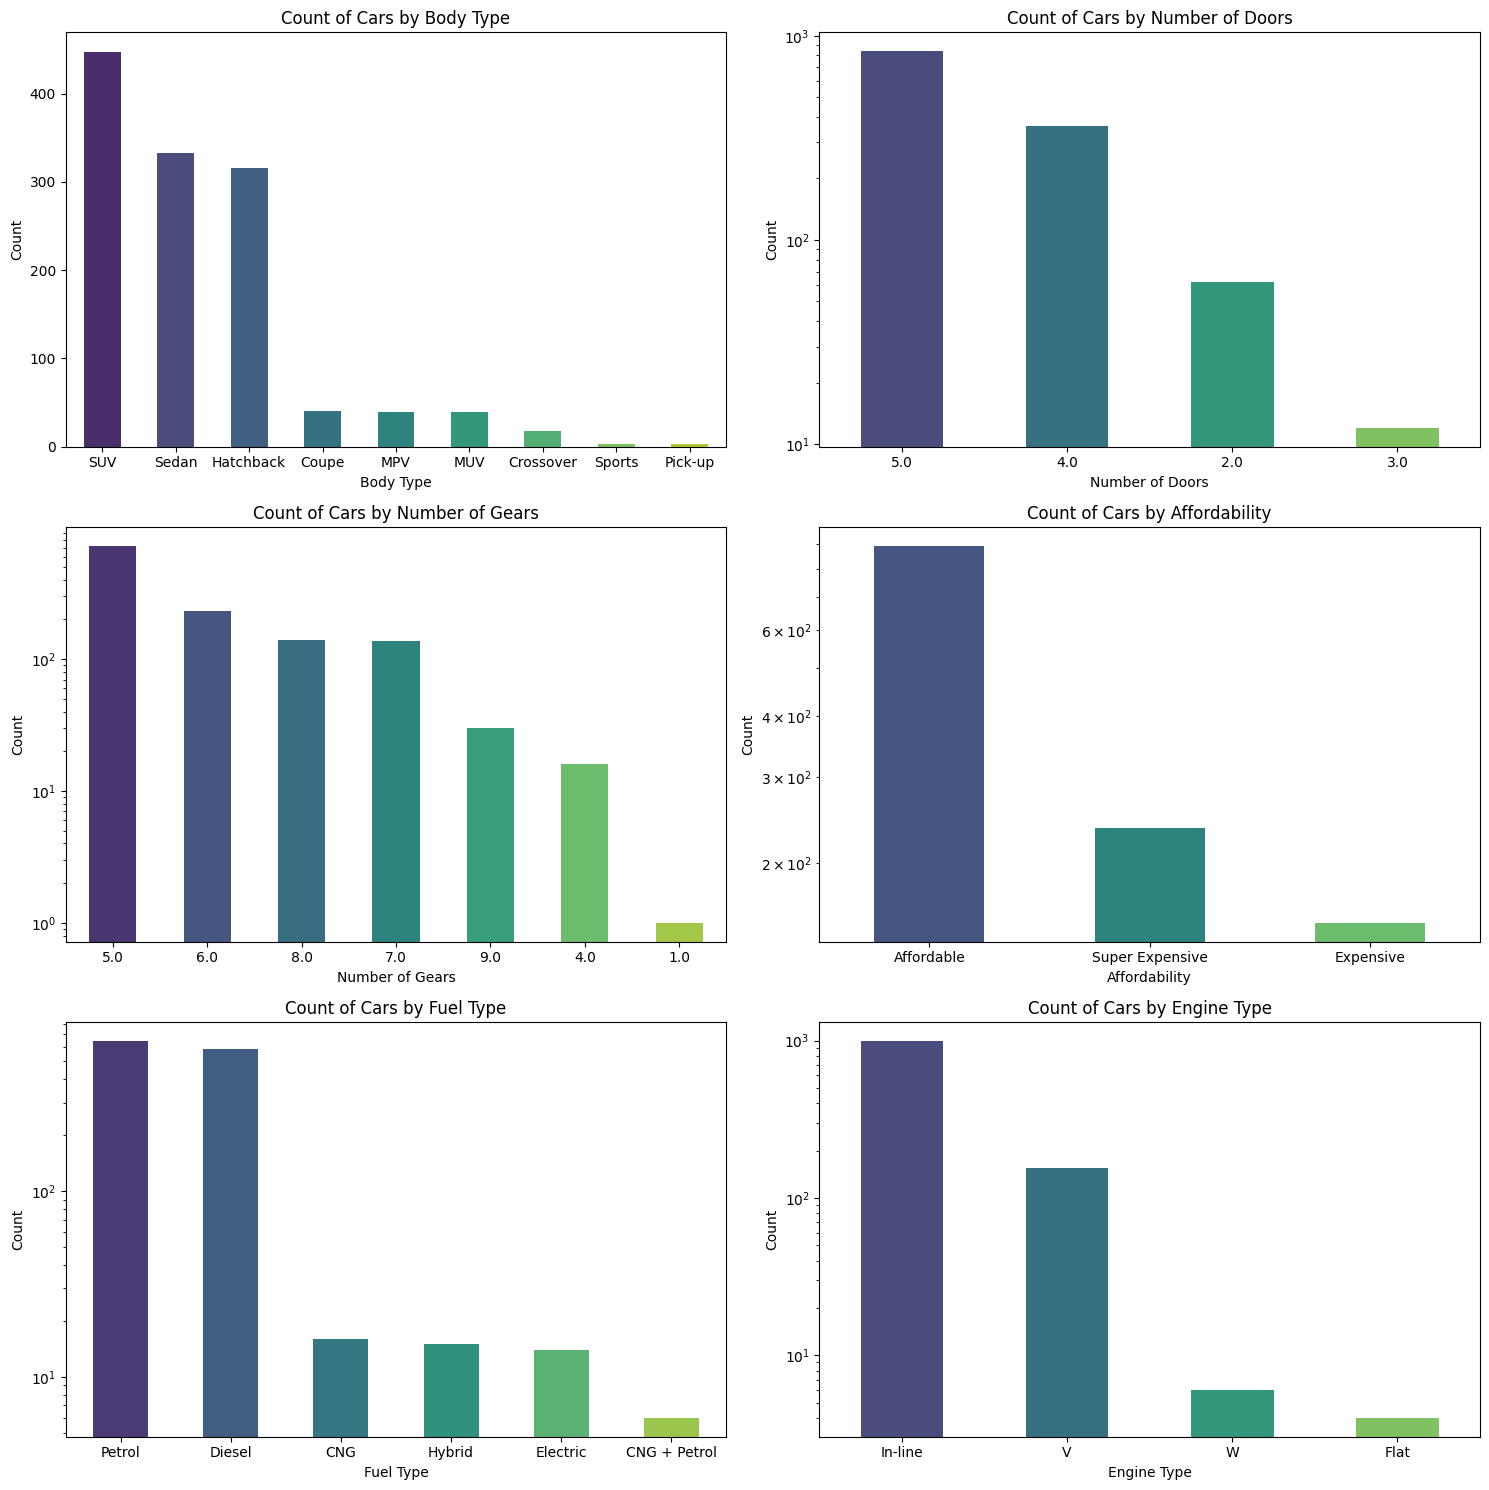

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

desired_body_types = ['Coupe', 'Crossover', 'Hatchback', 'MPV', 'MUV', 'Pick-up', 'Sedan', 'Sports', 'SUV']

# Filter the DataFrame to include only the desired body types
filtered_car = dataset[dataset['body_type'].isin(desired_body_types)]

# Order the body types by mean count in descending order
order_body_types_count = filtered_car['body_type'].value_counts().sort_values(ascending=False).index

sns.countplot(data=filtered_car, x='body_type', palette='viridis', order=order_body_types_count, width=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Count of Cars by Body Type')
axes[0, 0].set_xlabel('Body Type')
axes[0, 0].set_ylabel('Count')

sns.countplot(data=dataset, x='doors', palette='viridis', order=dataset['doors'].value_counts().sort_values(ascending=False).index, width=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Count of Cars by Number of Doors')
axes[0, 1].set_xlabel('Number of Doors')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_yscale('log')

sns.countplot(data=dataset, x='gears', palette='viridis', order=dataset['gears'].value_counts().sort_values(ascending=False).index, width=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Count of Cars by Number of Gears')
axes[1, 0].set_xlabel('Number of Gears')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_yscale('log')

sns.countplot(data=dataset, x='price_segment', order=dataset['price_segment'].value_counts().sort_values(ascending=False).index, width=0.5, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Count of Cars by Affordability')
axes[1, 1].set_xlabel('Affordability')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_yscale('log')

sns.countplot(data=dataset, x='fuel_type', palette='viridis', order=dataset['fuel_type'].value_counts().sort_values(ascending=False).index, width=0.5, ax=axes[2, 0])
axes[2, 0].set_title('Count of Cars by Fuel Type')
axes[2, 0].set_xlabel('Fuel Type')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_yscale('log')

sns.countplot(data=car_no_unspecified, x='cylinder_configuration', palette='viridis', order=car_no_unspecified['cylinder_configuration'].value_counts().sort_values(ascending=False).index, width=0.5, ax=axes[2, 1])
axes[2, 1].set_title('Count of Cars by Engine Type')
axes[2, 1].set_xlabel('Engine Type')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_yscale('log')

plt.tight_layout()
plt.show()

Violin Plots

<ipython-input-253-14023695c052>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_5_car_makes_data, x='make', y='ex-showroom_price_inr', palette='viridis')


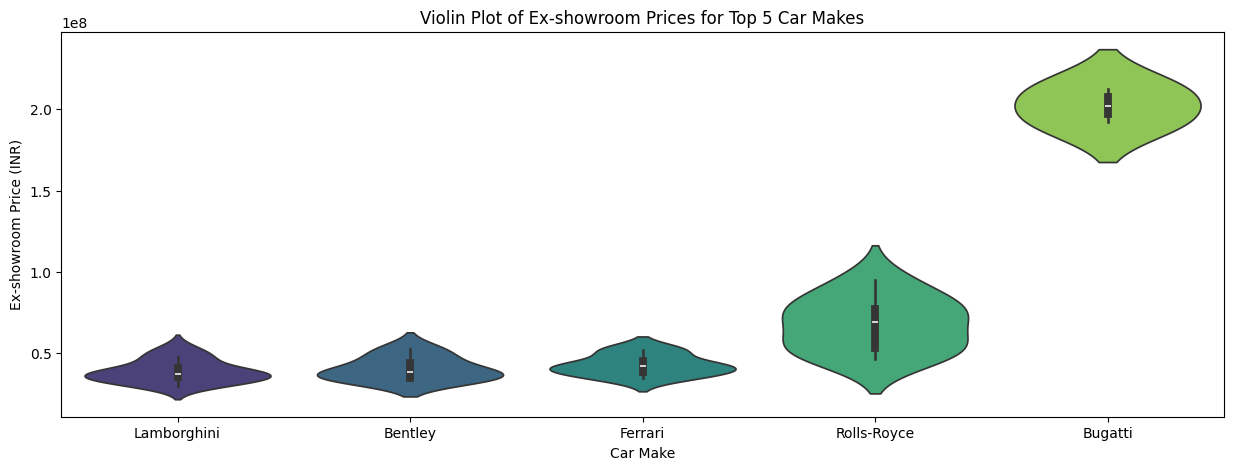

In [ ]:
top_5_makes = dataset.groupby('make')['ex-showroom_price_inr'].mean().sort_values(ascending=False).head(5).index

# Filter the dataset for the top 5 makes
top_5_car_makes_data = dataset[dataset['make'].isin(top_5_makes)]

# Create a Violin Plot with y-axis limit
plt.figure(figsize=(15, 5))
sns.violinplot(data=top_5_car_makes_data, x='make', y='ex-showroom_price_inr', palette='viridis')
plt.title('Violin Plot of Ex-showroom Prices for Top 5 Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Ex-showroom Price (INR)')
plt.show()

<ipython-input-254-9c3fd6b0e476>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dataset, x='fuel_type', y='arai_certified_mileage_kmpl', palette='viridis')


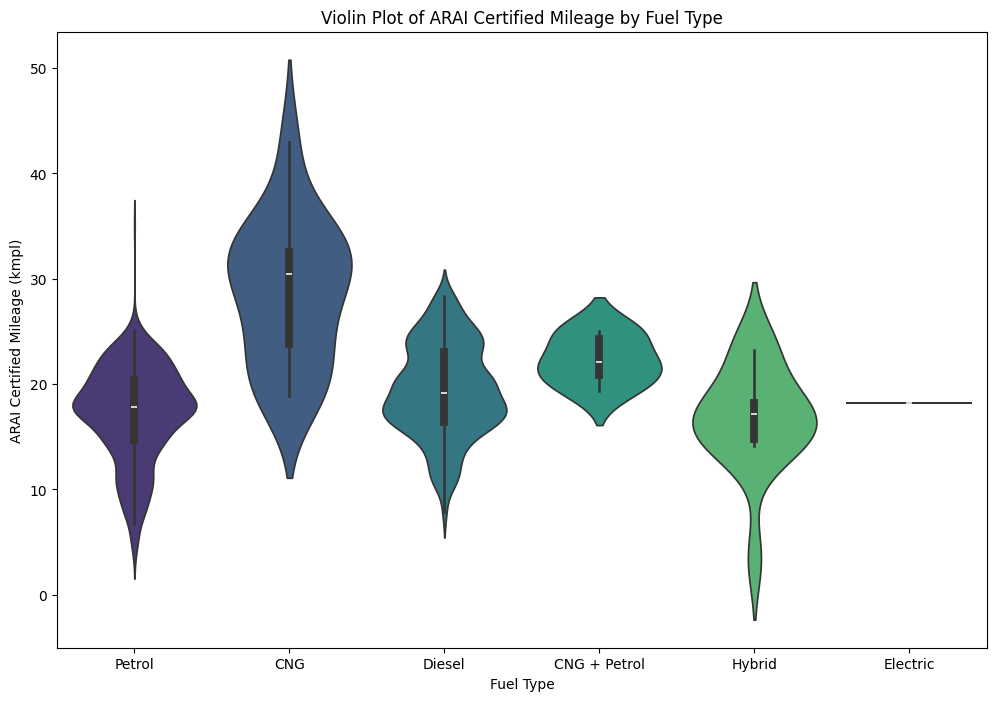

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=dataset, x='fuel_type', y='arai_certified_mileage_kmpl', palette='viridis')
plt.title('Violin Plot of ARAI Certified Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('ARAI Certified Mileage (kmpl)')
plt.show()

Stacked Bar charts

In [ ]:
sorted_fuel_types = sorted(dataset['fuel_type'].unique(), reverse=True)

# Create a stacked bar chart for Price Segment vs Fuel Type using Plotly
fig = px.histogram(dataset, x='fuel_type', color='price_segment', barmode='stack',
                   category_orders={'fuel_type': sorted_fuel_types},
                   labels={'fuel_type': 'Fuel Type', 'price_segment': 'Price Segment'},
                   title='Price Segment Distribution by Fuel Type')


fig.update_layout(xaxis_title='Fuel Type', yaxis_title='Count (log scale)', legend_title='Price Segment', yaxis_type="log")
# Sort bars in decreasing order
fig.update_xaxes(categoryorder='total descending')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


In [ ]:
car = dataset.drop(['feature_bins'], axis=1)
car

,make,model,variant,ex-showroom_price_inr,displacement_cc,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,emission_norm,...,engine_type,asr_/_traction_control,cruise_control,usb_ports,heads-up_display,welcome_lights,battery,electric_range,price_segment,num_features
0,Tata,Nano Genx,Xt,292667,624.0,2.0,2.0,RWD,In-line,BS IV,...,No,No,No,2.0,No,No,No,No,Affordable,28
1,Tata,Nano Genx,Xe,236447,624.0,2.0,2.0,RWD,In-line,BS IV,...,No,No,No,2.0,No,No,No,No,Affordable,21
2,Tata,Nano Genx,Emax Xm,296661,624.0,2.0,2.0,RWD,In-line,BS IV,...,No,No,No,2.0,No,No,No,No,Affordable,24
3,Tata,Nano Genx,Xta,334768,624.0,2.0,2.0,RWD,In-line,BS IV,...,No,No,No,2.0,No,No,No,No,Affordable,29
4,Tata,Nano Genx,Xm,272223,624.0,2.0,2.0,RWD,In-line,BS IV,...,No,No,No,2.0,No,No,No,No,Affordable,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1302000,1498.0,4.0,4.0,FWD,In-line,BS IV,...,No,No,Yes,2.0,No,No,No,No,Affordable,56
1272,Honda,City,Zx Mt Diesel,1421000,1498.0,4.0,4.0,FWD,In-line,BS IV,...,No,No,Yes,2.0,No,No,No,No,Affordable,59
1273,Honda,City,Zx Cvt Petrol,1431000,1497.0,4.0,4.0,FWD,In-line,BS VI,...,No,No,Yes,2.0,No,No,No,No,Affordable,55
1274,Honda,City,V Cvt Petrol,1201000,1497.0,4.0,4.0,FWD,In-line,BS VI,...,No,No,Yes,2.0,No,No,No,No,Affordable,51
